In [1]:
import sys
from pathlib import Path
import pandas as pd

# Notebook cell
%load_ext autoreload
%autoreload 2

# Get root directory (assuming notebook is in root/notebooks/)
NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent if NOTEBOOK_DIR.name == 'notebooks' else NOTEBOOK_DIR

# Add src directory to Python path
sys.path.append(str(ROOT_DIR / 'src'))

# Verify path
print(f"Python will look in these locations:\n{sys.path}")


# --- Execute the processor ---
import utils
from config import date_str, DOWNLOAD_DIR, DEST_DIR

path_data = f'..\data\{date_str}_df_finviz_merged.parquet'
path_corr = f'..\data\{date_str}_df_corr_emv_matrix.parquet'
path_cov = f'..\data\{date_str}_df_cov_emv_matrix.parquet'
path_output = f'..\picks\{date_str}_portf.txt'


print(utils.__file__)  # Should point to your src/utils.py
print(f'path_date: {path_data}')
print(f'path_corr: {path_corr}')
print(f'path_cov: {path_cov}')  
print(f'path_output: {path_output}')
print((f'date_str: {date_str}'))



Python will look in these locations:
['C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\python311.zip', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\DLLs', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\Lib', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9', 'C:\\Users\\ping\\Files_win10\\python\\py311\\.venv', '', 'C:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages', 'C:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32', 'C:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\ping\\Files_win10\\python\\py311\\stocks\\src']


c:\Users\ping\Files_win10\python\py311\stocks\src\utils.py
path_date: ..\data\2025-04-07_df_finviz_merged.parquet
path_corr: ..\data\2025-04-07_df_corr_emv_matrix.parquet
path_cov: ..\data\2025-04-07_df_cov_emv_matrix.parquet
path_output: ..\picks\2025-04-07_portf.txt
date_str: 2025-04-07


In [2]:
import pandas as pd
# Set pandas display options to show more columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', 10)       # Limit to 10 rows for readability
# pd.set_option('display.width', None)        # Let the display adjust to the window
# pd.set_option('display.max_colwidth', None) # Show full content of each cell
pd.set_option('display.max_rows', 100)
# pd.set_option('display.width', 120)
pd.set_option('display.float_format', '{:.4f}'.format)

In [3]:
import pandas as pd

def get_column_values_above_threshold(df, column_name='Avg Volume, M', threshold=1):
  """
  Analyzes the number and percentage of values in a DataFrame column that are above a specified threshold,
  and returns the filtered DataFrame.

  Args:
    df (pd.DataFrame): The input DataFrame.
    column_name (str): The name of the column to analyze. Defaults to 'Avg Volume, M'.
    threshold (float): The threshold value to compare against. Defaults to 1.00.

  Returns:
    pd.DataFrame: A DataFrame containing only the rows where the specified column's value is above the threshold.
  """
  
  count_before = len(df)
  above_threshold_df = df[df[column_name] > threshold]
  count_after = len(above_threshold_df)
  percentage = (count_after / len(df)) * 100

  print(f"count_before: {count_before}")
  print(f"count_after above threshold ({threshold}): {count_after}")
  print(f"Percentage above threshold ({threshold}): {percentage:.2f}%")

  return above_threshold_df


In [4]:
df_data = pd.read_parquet(path_data)

# liquidity filter, Avg Volume, M > 0.75M
df_data = get_column_values_above_threshold(df_data, column_name='Avg Volume, M', threshold=0.75)

# Drop specified columns with NaNs in df_data
df_data = df_data.drop(['All-Time High %', 'All-Time Low %', 'Dividend %'], axis=1)

df_corr = pd.read_parquet(path_corr)
df_cov = pd.read_parquet(path_cov)

print(f'\ndf_cov.shape: {df_cov.shape}')
display(df_cov.head())

print(f'\ndf_corr.shape: {df_corr.shape}')
display(df_corr.head())

print(f'\ndf_data.shape: {df_data.shape}')
display(df_data.head())
display((df_data.describe()))

count_before: 1536
count_after above threshold (0.75): 1169
Percentage above threshold (0.75): 76.11%



df_cov.shape: (1536, 1536)


Symbol      A     AA    AAL   AAON   AAPL   ABBV    ABEV   ABNB    ABT   ACGL  \
Symbol                                                                          
A      0.0005 0.0008 0.0005 0.0006 0.0006 0.0003  0.0001 0.0005 0.0002 0.0004   
AA     0.0008 0.0017 0.0008 0.0010 0.0010 0.0004  0.0002 0.0010 0.0002 0.0006   
AAL    0.0005 0.0008 0.0013 0.0008 0.0006 0.0001 -0.0003 0.0007 0.0001 0.0000   
AAON   0.0006 0.0010 0.0008 0.0013 0.0007 0.0002 -0.0000 0.0007 0.0001 0.0003   
AAPL   0.0006 0.0010 0.0006 0.0007 0.0010 0.0004  0.0002 0.0008 0.0003 0.0006   

Symbol     ACI   ACIW    ACM    ACN   ACWI    ACWV   ACWX   ADBE     ADC  \
Symbol                                                                     
A       0.0001 0.0004 0.0003 0.0004 0.0004  0.0002 0.0003 0.0004  0.0001   
AA      0.0001 0.0009 0.0005 0.0007 0.0007  0.0003 0.0005 0.0007  0.0001   
AAL    -0.0002 0.0005 0.0003 0.0004 0.0003 -0.0000 0.0001 0.0003 -0.0002   
AAON    0.0000 0.0005 0.0004 0.0005 0.0005  0.0001 0.0003 0.0006 -0.0000   
AAPL    0.0002 0.0008 0.0004 0.0006 0.0005  0.0003 0.0005 0.0006  0.0002   

Symbol    ADI     ADM    ADP   ADSK    ADT     AEE    AEG     AEM     AEP  \
Symbol                                                                      
A      0.0008  0.0003 0.0003 0.0004 0.0002  0.0002 0.0005  0.0003  0.0001   
AA     0.0012  0.0005 0.0004 0.0007 0.0005  0.0002 0.0010  0.0005  0.0000   
AAL    0.0009 -0.0000 0.0001 0.0004 0.0004 -0.0001 0.0003 -0.0001 -0.0002   
AAON   0.0009  0.0002 0.0002 0.0005 0.0003  0.0001 0.0006  0.0003 -0.0001   
AAPL   0.0009  0.0005 0.0004 0.0005 0.0005  0.0002 0.0008  0.0004  0.0002   

Symbol    AER    AES     AFG     AFL   AFRM   AGCO     AGG     AGI   AGNC  \
Symbol                                                                      
A      0.0006 0.0005  0.0003  0.0003 0.0011 0.0005 -0.0000  0.0003 0.0002   
AA     0.0010 0.0009  0.0004  0.0006 0.0020 0.0010 -0.0001  0.0005 0.0003   
AAL    0.0004 0.0003 -0.0000 -0.0000 0.0018 0.0008 -0.0001 -0.0001 0.0000   
AAON   0.0006 0.0005  0.0002  0.0003 0.0016 0.0006 -0.0001  0.0003 0.0002   
AAPL   0.0007 0.0007  0.0005  0.0005 0.0014 0.0009 -0.0000  0.0004 0.0003   

Symbol    AIG    AIT    AIZ     AJG   AKAM   ALAB    ALB    ALC   ALGN    ALK  \
Symbol                                                                          
A      0.0004 0.0004 0.0004  0.0003 0.0004 0.0008 0.0007 0.0004 0.0003 0.0005   
AA     0.0006 0.0009 0.0007  0.0004 0.0007 0.0015 0.0013 0.0005 0.0007 0.0011   
AAL    0.0001 0.0007 0.0001 -0.0001 0.0003 0.0012 0.0006 0.0002 0.0006 0.0010   
AAON   0.0003 0.0007 0.0004  0.0002 0.0005 0.0014 0.0008 0.0004 0.0006 0.0008   
AAPL   0.0006 0.0007 0.0006  0.0004 0.0006 0.0009 0.0010 0.0005 0.0004 0.0008   

Symbol     ALL   ALLE   ALLY   ALNY   ALSN    ALV     AM   AMAT   AMCR    AMD  \
Symbol                                                                          
A       0.0003 0.0003 0.0005 0.0006 0.0005 0.0004 0.0004 0.0006 0.0002 0.0006   
AA      0.0005 0.0004 0.0009 0.0008 0.0010 0.0008 0.0008 0.0011 0.0003 0.0013   
AAL    -0.0001 0.0003 0.0008 0.0004 0.0006 0.0006 0.0002 0.0008 0.0001 0.0007   
AAON    0.0002 0.0003 0.0007 0.0007 0.0007 0.0006 0.0005 0.0008 0.0002 0.0009   
AAPL    0.0005 0.0005 0.0008 0.0007 0.0008 0.0006 0.0006 0.0007 0.0004 0.0010   

Symbol    AME    AMGN    AMH   AMLP    AMP     AMT     AMX   AMZN     AN  \
Symbol                                                                     
A      0.0005  0.0001 0.0002 0.0004 0.0006 -0.0000  0.0001 0.0005 0.0003   
AA     0.0008  0.0001 0.0004 0.0007 0.0011 -0.0002  0.0001 0.0010 0.0006   
AAL    0.0005 -0.0001 0.0001 0.0002 0.0007 -0.0004 -0.0003 0.0008 0.0006   
AAON   0.0006  0.0000 0.0002 0.0004 0.0007 -0.0002  0.0001 0.0008 0.0006   
AAPL   0.0006  0.0002 0.0004 0.0006 0.0008  0.0000  0.0001 0.0007 0.0004   

Symbol   ANET   ANGL   ANSS     AON    AOS    APA    APD    APG    APH    APO  \
Symbol                                                               


df_corr.shape: (1536, 1536)


Symbol      A     AA    AAL   AAON   AAPL   ABBV    ABEV   ABNB    ABT   ACGL  \
Symbol                                                                          
A      1.0000 0.8235 0.6257 0.7186 0.7580 0.6531  0.1730 0.7352 0.5278 0.5747   
AA     0.8235 1.0000 0.5807 0.6681 0.7857 0.4823  0.2041 0.7763 0.3024 0.5208   
AAL    0.6257 0.5807 1.0000 0.5980 0.4810 0.0937 -0.3145 0.6412 0.0882 0.0043   
AAON   0.7186 0.6681 0.5980 1.0000 0.5625 0.2098 -0.0111 0.6424 0.1668 0.2841   
AAPL   0.7580 0.7857 0.4810 0.5625 1.0000 0.5353  0.3021 0.7731 0.4889 0.6323   

Symbol     ACI   ACIW    ACM    ACN   ACWI    ACWV   ACWX   ADBE     ADC  \
Symbol                                                                     
A       0.1655 0.6846 0.7169 0.7522 0.8599  0.5431 0.6885 0.6141  0.1553   
AA      0.1281 0.7986 0.7236 0.7047 0.8470  0.4692 0.6973 0.6559  0.1048   
AAL    -0.3338 0.4519 0.4486 0.4886 0.4241 -0.0771 0.1193 0.3482 -0.3155   
AAON    0.0036 0.5158 0.6527 0.5616 0.6612  0.2754 0.5060 0.5759 -0.0348   
AAPL    0.2303 0.8542 0.7770 0.7460 0.8703  0.6318 0.7572 0.7183  0.3660   

Symbol    ADI     ADM    ADP   ADSK    ADT     AEE    AEG     AEM     AEP  \
Symbol                                                                      
A      0.8817  0.5528 0.6056 0.7624 0.4545  0.4332 0.7640  0.5600  0.2039   
AA     0.7829  0.4148 0.5165 0.8498 0.5900  0.3234 0.7783  0.4407  0.0478   
AAL    0.6647 -0.0320 0.0838 0.5143 0.4997 -0.1573 0.3054 -0.1265 -0.3295   
AAON   0.6419  0.1969 0.3041 0.6748 0.4222  0.1031 0.5356  0.3108 -0.1051   
AAPL   0.7259  0.5528 0.6751 0.8053 0.6867  0.3890 0.8342  0.4382  0.2911   

Symbol    AER    AES     AFG     AFL   AFRM   AGCO     AGG     AGI   AGNC  \
Symbol                                                                      
A      0.8451 0.6954  0.4848  0.5969 0.7256 0.6313 -0.4555  0.5067 0.5053   
AA     0.8291 0.6715  0.4469  0.5394 0.7664 0.6903 -0.3436  0.4431 0.4774   
AAL    0.3771 0.2439 -0.0436 -0.0044 0.7596 0.6585 -0.5419 -0.1463 0.0671   
AAON   0.5570 0.4275  0.2580  0.3049 0.6907 0.4975 -0.3146  0.2922 0.3079   
AAPL   0.7376 0.6209  0.6446  0.6410 0.6553 0.7623 -0.0672  0.4164 0.6505   

Symbol    AIG    AIT    AIZ     AJG   AKAM   ALAB    ALB    ALC   ALGN    ALK  \
Symbol                                                                          
A      0.6929 0.6714 0.6486  0.5026 0.6117 0.6392 0.8062 0.6964 0.6267 0.6839   
AA     0.5952 0.7870 0.6771  0.4150 0.6107 0.7030 0.8320 0.5125 0.7036 0.7670   
AAL    0.1057 0.7163 0.1602 -0.1312 0.2916 0.6217 0.4418 0.2433 0.7555 0.8328   
AAON   0.3343 0.7197 0.3844  0.2058 0.5028 0.7413 0.5547 0.4019 0.7149 0.6567   
AAPL   0.7001 0.7799 0.7663  0.5421 0.6949 0.5244 0.7838 0.6778 0.5605 0.6841   

Symbol     ALL   ALLE   ALLY   ALNY   ALSN    ALV     AM   AMAT   AMCR    AMD  \
Symbol                                                                          
A       0.4614 0.6358 0.6205 0.6628 0.7574 0.7161 0.6965 0.8309 0.4857 0.7547   
AA      0.4556 0.5773 0.7075 0.5017 0.8307 0.8004 0.6833 0.7864 0.4812 0.8334   
AAL    -0.1506 0.4866 0.6534 0.2712 0.6167 0.6343 0.1744 0.6731 0.1173 0.5173   
AAON    0.1737 0.4992 0.5807 0.4387 0.6887 0.6793 0.4816 0.7027 0.3078 0.7040   
AAPL    0.5362 0.7915 0.7659 0.5221 0.8299 0.7625 0.6927 0.6137 0.6925 0.8106   

Symbol    AME    AMGN    AMH   AMLP    AMP     AMT     AMX   AMZN     AN  \
Symbol                                                                     
A      0.8823  0.3720 0.4887 0.7356 0.8767 -0.0977  0.1543 0.7647 0.5176   
AA     0.8743  0.1547 0.4675 0.7593 0.8717 -0.2250  0.0885 0.7911 0.6215   
AAL    0.6488 -0.2101 0.0900 0.2205 0.6506 -0.5791 -0.4092 0.7475 0.6676   
AAON   0.6955  0.0188 0.2182 0.4848 0.6665 -0.2676  0.0640 0.7387 0.6734   
AAPL   0.8549  0.3080 0.6840 0.7966 0.8189  0.0043  0.1714 0.7145 0.5600   

Symbol   ANET   ANGL   ANSS     AON    AOS    APA    APD    APG    APH    APO  \
Symbol                                                               


df_data.shape: (1169, 52)


,Company,Info,"MktCap AUM, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,ATR/Price %,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAPL,Apple Inc,"Technology, Consumer Electronics",2725910.0000,1.3000,22.7600,-27.5400,-18.9513,-18.3100,-24.1000,-25.4400,-19.5900,7.4900,-15.3100,-20.4800,-20.7100,-27.4200,-3.1400,-30.2300,10.6000,8.5600,4.7173,3.6400,2.9600,157.5177,54.5700,2.8900,181.4600,-3.6700,-34.1343,-15.0801,0.0000,-18.7987,-12.8173,0.0147,-9.1883,-8.4353,0.1552,-4.9401,-5.0753,0.3796,-5.9728,-5.9605,0.3298,-2.9234,-3.2515,0.5835,-1.7229,-1.9777,0.7242,0.2576,0.3418,1.0480
MSFT,Microsoft Corporation,"Technology, Software - Infrastructure",2660320.0000,0.9500,28.9700,-15.1000,-6.3537,-4.6700,-9.0100,-15.4700,-14.0900,-14.3600,-6.4100,-10.1000,-14.8800,-20.1900,-0.4500,-23.5900,-0.4500,10.6600,2.9788,2.7800,2.1800,49.9717,23.6900,2.1100,357.8600,-0.5500,-15.4525,-12.8435,0.0000,-15.8809,-12.0021,0.0000,-10.3029,-9.4672,0.1637,-4.9281,-5.3380,0.4243,-3.5441,-4.2384,0.5543,-2.4739,-3.0639,0.6422,-1.3776,-1.6973,0.7790,-0.8384,-1.0542,0.8659
NVDA,NVIDIA Corp,"Technology, Semiconductors",2382420.0000,2.0800,33.1900,-27.2900,-11.5740,-9.9100,-13.3600,-32.4200,-20.5200,13.6600,-13.2100,-18.9100,-23.0400,-34.4600,6.0000,-36.2400,29.1400,6.7200,6.8824,5.6200,4.3400,606.1242,286.6800,2.1100,97.6400,3.5300,-3.9776,-5.8738,0.4767,-8.0685,-8.4554,0.2464,-9.1033,-8.6352,0.2078,-5.0398,-5.4015,0.4105,-3.0910,-3.5991,0.6070,-1.7685,-2.1198,0.7388,-1.0989,-1.3652,0.8292,0.4580,0.6305,1.0789
AMZN,Amazon.com Inc,"Consumer Cyclical, Internet Retail",1857360.0000,1.2800,32.0400,-20.1100,-10.5862,-7.8800,-12.0400,-21.8300,-3.6800,-2.6300,-9.4200,-16.9800,-12.4500,-27.7300,5.5800,-27.7300,15.6000,9.0100,5.1409,4.8900,3.3300,108.6942,42.8300,2.5400,175.2600,2.4900,-2.8615,-4.5605,0.5937,-6.3296,-6.9703,0.3386,-7.4216,-7.3608,0.2639,-3.0463,-3.4291,0.5785,-3.8145,-4.2106,0.5307,-2.6468,-3.0492,0.6384,-0.3967,-0.5149,0.9359,-0.1704,-0.2246,0.9717
GOOG,Alphabet Inc,"Communication Services, Internet Content & Inf...",1804770.0000,0.9900,30.9000,-21.6300,-6.0556,-4.4700,-15.0800,-22.7300,-10.7500,-1.7800,-8.1000,-15.3400,-15.1200,-28.4900,1.1500,-28.4900,1.1500,5.6100,3.7590,2.8300,2.7700,47.4666,20.5300,2.3100,149.2400,1.0200,-5.9070,-7.7406,0.3104,-10.2228,-9.6536,0.1391,-10.7747,-9.5479,0.1610,-3.9401,-4.4441,0.5313,-4.2246,-4.7152,0.5269,-3.1932,-3.6436,0.5934,-0.6683,-0.8863,0.8956,-0.1738,-0.2377,0.9705


,"MktCap AUM, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,ATR/Price %,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
count,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000
mean,55795.1839,0.9854,31.6934,-9.7945,-10.7009,-9.6066,-11.1067,-10.6564,-9.1440,0.8547,-9.2417,-11.8859,-10.4794,-20.9440,3.7012,-25.8106,20.1188,3.8673,4.2222,3.8480,2.9341,14.5787,6.2988,2.2432,92.7660,-0.9005,-45.1334,-7.5405,0.4925,-10.4741,-8.9140,0.2238,-6.7032,-6.1521,0.3653,-4.3357,-4.3223,0.4948,-2.8242,-3.0458,0.6438,-0.9287,-0.9384,0.8842,-0.7968,-0.9095,0.8823,-0.0398,0.0385,1.0060
std,182071.9746,0.5524,9.1425,15.2119,5.8863,5.6345,8.6759,15.5463,19.0709,42.6303,6.0163,9.1929,13.2462,12.0477,6.7114,14.7066,47.6077,5.0695,2.4419,2.0954,1.6055,40.0973,14.0789,1.3199,105.5778,2.5414,177.8013,46.3540,4.1070,5.3190,5.0132,0.4826,3.8612,4.4720,0.4883,2.8749,3.1203,0.3557,2.0391,2.3764,0.2804,1.7355,2.3005,0.2997,1.1285,1.4911,0.1918,0.8615,1.2749,0.1653
min,2980.0000,-3.3800,9.1100,-72.6100,-43.7269,-42.6300,-56.1800,-73.2300,-74.0100,-84.1800,-47.0300,-58.9500,-72.3800,-73.8100,-6.3600,-95.3300,-6.3600,0.0200,0.0359,0.0100,0.0100,0.7550,0.7501,0.8000,2.1100,-10.8500,-3833.2595,-15.8744,0.0000,-45.4689,-15.1951,0.0000,-17.6704,-12.1364,0.0000,-14.8588,-11.1668,0.0542,-7.3675,-7.4273,0.1731,-5.6580,-5.9760,0.2590,-3.8979,-4.3180,0.4801,-2.6324,-3.0522,0.6189
25%,8340.0000,0.6600,24.9200,-19.2300,-14.1755,-12.6300,-16.1000,-20.3700,-19.2100,-16.3500,-12.8000,-17.4100,-18.2800,-28.0600,-0.3200,-35.3100,1.7900,0.9600,2.7730,2.6200,2.0500,2.8640,1.5000,1.5400,31.5700,-2.4100,-27.7530,-14.7164,0.0000,-13.6961,-11.2679,0.0468,-9.3100,-8.5536,0.1321,-6.0179,-6.1847,0.2833,-4.3306,-4.7055,0.4455,-2.2161,-2.5839,0.6643,-1.6671,-2.0167,0.7393,-0.6103,-0.7965,0.8963
50%,16910.0000,0.9700,30.0800,-9.7300,-10.7720,-9.8100,-11.7800,-10.5800,-10.6600,-2.6900,-9.5100,-11.8300,-10.6600,-19.2700,1.9400,-23.9300,7.3600,2.3100,3.7427,3.4800,2.7200,5.3756,2.6200,1.9100,59.3500,-1.0300,-15.5321,-12.8663,0.0000,-10.4640,-9.7546,0.1217,-7.3238,-7.2577,0.2288,-4.5844,-4.8617,0.4045,-3.1780,-3.6444,0.5688,-1.2176,-1.5195,0.8040,-0.8808,-1.1255,0.8519,-0.1080,-0.1448,0.9806
75%,43920.0000,1.2300,37.3100,-0.7000,-7.2933,-6.2800,-5.1600,-0.7100,-0.5800,10.1300,-5.2200,-5.3800,-1.7100,-12.6300,5.8500,-15.0000,23.7000,4.9100,5.2838,4.8300,3.6600,12.7096,5.5100,2.5000,108.0500,0.2200,-9.5430,-10.3159,0.0810,-6.9504,-7.5598,0.2824,-4.6706,-5.1172,0.4192,-2.7415,-3.2188,0.6031,-1.5471,-1.8770,0.7642,0.2371,0.3043,1.0400,-0.0568,-0.0786,0.9896,0.4797,0.6598,1.0901
max,2725910.0000,4.2500,79.8800,61.1100,37.0765,30.8600,45.5500,68.1300,145.9500,848.0000,30.7000,50.5900,50.8000,-0.0400,91.3800,-0.0400,971.8600,44.6200,25.2459,18.8900,14.9700,716.6563,286.6800,26.9800,908.1300,16.2200,144.7788,513.9591,46.7871,11.7184,110.5006,13.0365,10.1651,72.0544,9.9401,6.6845,20.9286,3.6986,4.8525,12.5112,2.3557,4.4300,9.7330,2.2790,2.5016,5.7738,1.8774,3.7578,7.5376,1.8147


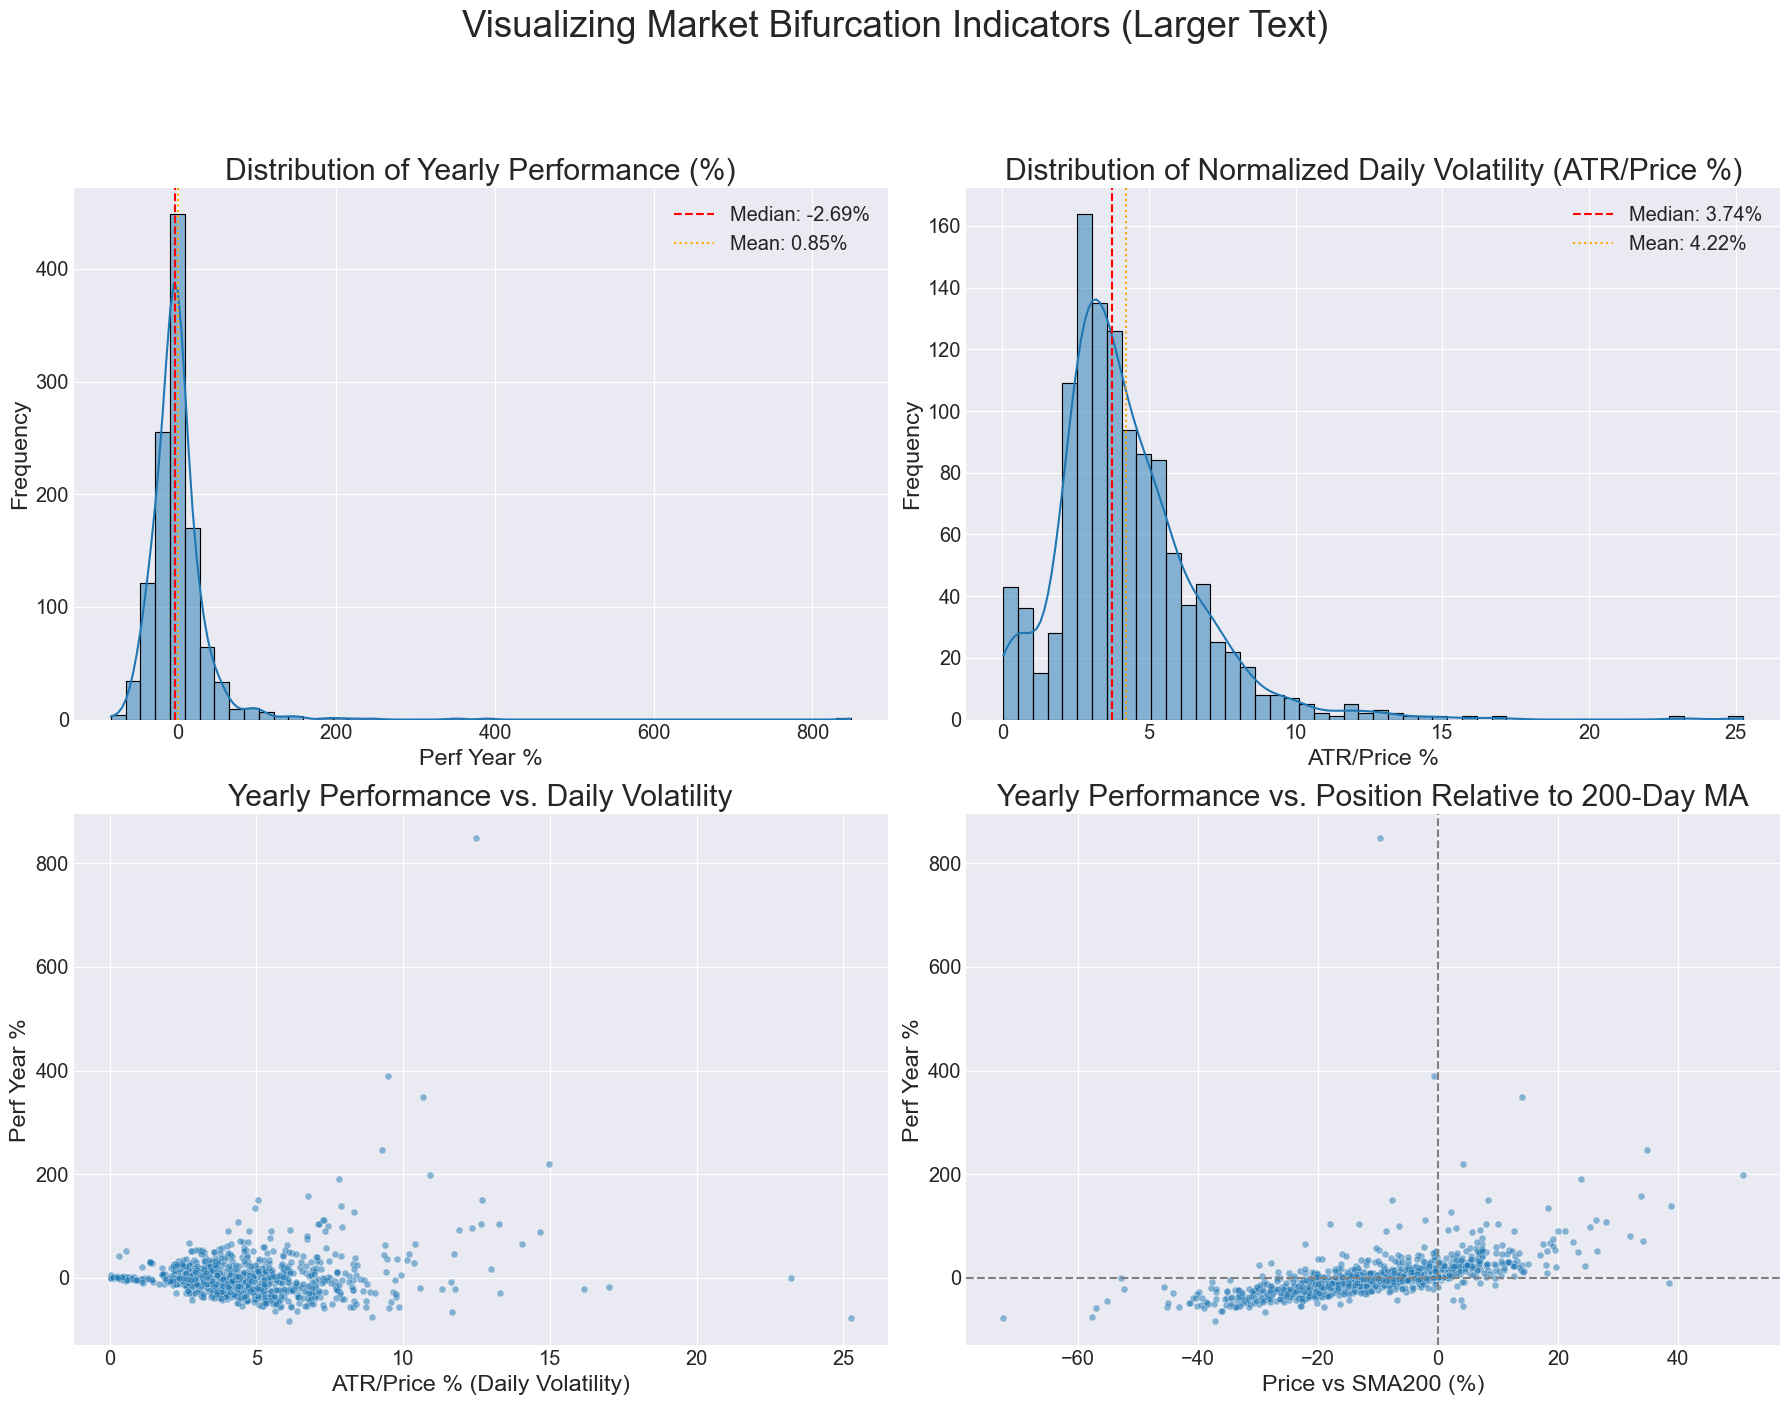

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Will be used if we need to handle potential infinite values if any

# --- IMPORTANT ---
# Ensure your DataFrame is named df_data and contains the columns used below.
# Example: (replace this with your actual data loading)
# df_data = pd.read_csv('your_market_data.csv')

# --- Data Cleaning (Optional but Recommended) ---
# Replace potential infinite values with NaN
df_data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Use a copy to avoid modifying original if needed later
df_plot = df_data.copy()

# --- Font Size Definitions ---
SCALE_FONTSIZE = 1.2  # Scale factor for font sizes
TITLE_FONTSIZE = 18 * SCALE_FONTSIZE
AXIS_LABEL_FONTSIZE = 14 * SCALE_FONTSIZE
TICK_LABEL_FONTSIZE = 12 * SCALE_FONTSIZE
LEGEND_FONTSIZE = 12 * SCALE_FONTSIZE
SUPTITLE_FONTSIZE = 22 * SCALE_FONTSIZE

# --- Visualization ---

plt.style.use('seaborn-v0_8-darkgrid') # Use a visually appealing style
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Increased figure size slightly for larger text
fig.suptitle('Visualizing Market Bifurcation Indicators (Larger Text)', fontsize=SUPTITLE_FONTSIZE, y=1.03) # Adjusted y position slightly

# 1. Histogram of Yearly Performance ('Perf Year %')
sns.histplot(data=df_plot, x='Perf Year %', kde=True, ax=axes[0, 0], bins=50)
axes[0, 0].set_title('Distribution of Yearly Performance (%)', fontsize=TITLE_FONTSIZE)
axes[0, 0].set_xlabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 0].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE) # Added y-axis label
axes[0, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['Perf Year %'].median()
mean_val = df_plot['Perf Year %'].mean()
axes[0, 0].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 0].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 0].legend(fontsize=LEGEND_FONTSIZE)

# 2. Histogram of Normalized Volatility ('ATR/Price %')
sns.histplot(data=df_plot, x='ATR/Price %', kde=True, ax=axes[0, 1], bins=50)
axes[0, 1].set_title('Distribution of Normalized Daily Volatility (ATR/Price %)', fontsize=TITLE_FONTSIZE)
axes[0, 1].set_xlabel('ATR/Price %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 1].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE) # Added y-axis label
axes[0, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['ATR/Price %'].median()
mean_val = df_plot['ATR/Price %'].mean()
axes[0, 1].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 1].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 1].legend(fontsize=LEGEND_FONTSIZE)

# 3. Scatter Plot: Yearly Performance vs. Normalized Volatility
sns.scatterplot(data=df_plot, x='ATR/Price %', y='Perf Year %', ax=axes[1, 0], alpha=0.5, s=25) # Slightly larger points
axes[1, 0].set_title('Yearly Performance vs. Daily Volatility', fontsize=TITLE_FONTSIZE)
axes[1, 0].set_xlabel('ATR/Price % (Daily Volatility)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)

# 4. Scatter Plot: Yearly Performance vs. Distance from 200-Day MA
sns.scatterplot(data=df_plot, x='SMA200 %', y='Perf Year %', ax=axes[1, 1], alpha=0.5, s=25) # Slightly larger points
axes[1, 1].set_title('Yearly Performance vs. Position Relative to 200-Day MA', fontsize=TITLE_FONTSIZE)
axes[1, 1].set_xlabel('Price vs SMA200 (%)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
axes[1, 1].axvline(0, color='grey', linestyle='--') # Line at 0% (on the SMA200)
axes[1, 1].axhline(0, color='grey', linestyle='--') # Line at 0% Perf Year

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout slightly for suptitle
plt.show()

In [6]:
# Check df_corr
has_nan_corr = df_corr.isnull().any().any()
print(f"Are there any NaNs in df_corr? {has_nan_corr}")

# Check df_cov
has_nan_cov = df_cov.isnull().any().any()
print(f"Are there any NaNs in df_cov? {has_nan_cov}")

Are there any NaNs in df_corr? False
Are there any NaNs in df_cov? False


In [7]:
df_data.columns

Index(['Company', 'Info', 'MktCap AUM, M', 'Beta', 'RSI', 'Perf YTD %',
       'Perf 3D %', 'Perf Week %', 'Perf Month %', 'Perf Quart %',
       'Perf Half %', 'Perf Year %', 'SMA20 %', 'SMA50 %', 'SMA200 %',
       '50D High %', '50D Low %', '52W High %', '52W Low %', 'ATR',
       'ATR/Price %', 'Volatility W %', 'Volatility M %', 'Volume, M',
       'Avg Volume, M', 'Rel Volume', 'Price', 'Change %', 'Sharpe 3d',
       'Sortino 3d', 'Omega 3d', 'Sharpe 5d', 'Sortino 5d', 'Omega 5d',
       'Sharpe 10d', 'Sortino 10d', 'Omega 10d', 'Sharpe 15d', 'Sortino 15d',
       'Omega 15d', 'Sharpe 30d', 'Sortino 30d', 'Omega 30d', 'Sharpe 60d',
       'Sortino 60d', 'Omega 60d', 'Sharpe 120d', 'Sortino 120d', 'Omega 120d',
       'Sharpe 250d', 'Sortino 250d', 'Omega 250d'],
      dtype='object')

In [8]:
df_data.describe()

,"MktCap AUM, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,ATR/Price %,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
count,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000,1169.0000
mean,55795.1839,0.9854,31.6934,-9.7945,-10.7009,-9.6066,-11.1067,-10.6564,-9.1440,0.8547,-9.2417,-11.8859,-10.4794,-20.9440,3.7012,-25.8106,20.1188,3.8673,4.2222,3.8480,2.9341,14.5787,6.2988,2.2432,92.7660,-0.9005,-45.1334,-7.5405,0.4925,-10.4741,-8.9140,0.2238,-6.7032,-6.1521,0.3653,-4.3357,-4.3223,0.4948,-2.8242,-3.0458,0.6438,-0.9287,-0.9384,0.8842,-0.7968,-0.9095,0.8823,-0.0398,0.0385,1.0060
std,182071.9746,0.5524,9.1425,15.2119,5.8863,5.6345,8.6759,15.5463,19.0709,42.6303,6.0163,9.1929,13.2462,12.0477,6.7114,14.7066,47.6077,5.0695,2.4419,2.0954,1.6055,40.0973,14.0789,1.3199,105.5778,2.5414,177.8013,46.3540,4.1070,5.3190,5.0132,0.4826,3.8612,4.4720,0.4883,2.8749,3.1203,0.3557,2.0391,2.3764,0.2804,1.7355,2.3005,0.2997,1.1285,1.4911,0.1918,0.8615,1.2749,0.1653
min,2980.0000,-3.3800,9.1100,-72.6100,-43.7269,-42.6300,-56.1800,-73.2300,-74.0100,-84.1800,-47.0300,-58.9500,-72.3800,-73.8100,-6.3600,-95.3300,-6.3600,0.0200,0.0359,0.0100,0.0100,0.7550,0.7501,0.8000,2.1100,-10.8500,-3833.2595,-15.8744,0.0000,-45.4689,-15.1951,0.0000,-17.6704,-12.1364,0.0000,-14.8588,-11.1668,0.0542,-7.3675,-7.4273,0.1731,-5.6580,-5.9760,0.2590,-3.8979,-4.3180,0.4801,-2.6324,-3.0522,0.6189
25%,8340.0000,0.6600,24.9200,-19.2300,-14.1755,-12.6300,-16.1000,-20.3700,-19.2100,-16.3500,-12.8000,-17.4100,-18.2800,-28.0600,-0.3200,-35.3100,1.7900,0.9600,2.7730,2.6200,2.0500,2.8640,1.5000,1.5400,31.5700,-2.4100,-27.7530,-14.7164,0.0000,-13.6961,-11.2679,0.0468,-9.3100,-8.5536,0.1321,-6.0179,-6.1847,0.2833,-4.3306,-4.7055,0.4455,-2.2161,-2.5839,0.6643,-1.6671,-2.0167,0.7393,-0.6103,-0.7965,0.8963
50%,16910.0000,0.9700,30.0800,-9.7300,-10.7720,-9.8100,-11.7800,-10.5800,-10.6600,-2.6900,-9.5100,-11.8300,-10.6600,-19.2700,1.9400,-23.9300,7.3600,2.3100,3.7427,3.4800,2.7200,5.3756,2.6200,1.9100,59.3500,-1.0300,-15.5321,-12.8663,0.0000,-10.4640,-9.7546,0.1217,-7.3238,-7.2577,0.2288,-4.5844,-4.8617,0.4045,-3.1780,-3.6444,0.5688,-1.2176,-1.5195,0.8040,-0.8808,-1.1255,0.8519,-0.1080,-0.1448,0.9806
75%,43920.0000,1.2300,37.3100,-0.7000,-7.2933,-6.2800,-5.1600,-0.7100,-0.5800,10.1300,-5.2200,-5.3800,-1.7100,-12.6300,5.8500,-15.0000,23.7000,4.9100,5.2838,4.8300,3.6600,12.7096,5.5100,2.5000,108.0500,0.2200,-9.5430,-10.3159,0.0810,-6.9504,-7.5598,0.2824,-4.6706,-5.1172,0.4192,-2.7415,-3.2188,0.6031,-1.5471,-1.8770,0.7642,0.2371,0.3043,1.0400,-0.0568,-0.0786,0.9896,0.4797,0.6598,1.0901
max,2725910.0000,4.2500,79.8800,61.1100,37.0765,30.8600,45.5500,68.1300,145.9500,848.0000,30.7000,50.5900,50.8000,-0.0400,91.3800,-0.0400,971.8600,44.6200,25.2459,18.8900,14.9700,716.6563,286.6800,26.9800,908.1300,16.2200,144.7788,513.9591,46.7871,11.7184,110.5006,13.0365,10.1651,72.0544,9.9401,6.6845,20.9286,3.6986,4.8525,12.5112,2.3557,4.4300,9.7330,2.2790,2.5016,5.7738,1.8774,3.7578,7.5376,1.8147


In [9]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1169 entries, AAPL to EWU
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1169 non-null   object 
 1   Info            1169 non-null   object 
 2   MktCap AUM, M   1169 non-null   float64
 3   Beta            1169 non-null   float64
 4   RSI             1169 non-null   float64
 5   Perf YTD %      1169 non-null   float64
 6   Perf 3D %       1169 non-null   float64
 7   Perf Week %     1169 non-null   float64
 8   Perf Month %    1169 non-null   float64
 9   Perf Quart %    1169 non-null   float64
 10  Perf Half %     1169 non-null   float64
 11  Perf Year %     1169 non-null   float64
 12  SMA20 %         1169 non-null   float64
 13  SMA50 %         1169 non-null   float64
 14  SMA200 %        1169 non-null   float64
 15  50D High %      1169 non-null   float64
 16  50D Low %       1169 non-null   float64
 17  52W High %      1169 non-null   floa

In [10]:
import pandas as pd
import numpy as np
import logging
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

# ==============================================================================
# Helper Functions
# ==============================================================================

def setup_logging(output_file):    
    """Configures logging to write to both console and file."""
    # Remove existing handlers to avoid duplicate logs if called multiple times
    for handler in logging.root.handlers[:]:
        logging.root.removeHandler(handler)

    logging.basicConfig(
        level=logging.INFO,
        format='%(asctime)s - %(levelname)s - %(message)s',
        handlers=[
            logging.FileHandler(output_file, mode='w'), # 'w' mode overwrites old file
            logging.StreamHandler()
        ]
    )
    logging.info(f"Logging configured. Output file: {output_file}")


import pandas as pd
import numpy as np
import logging

# Assume logging is configured elsewhere, e.g.:
# logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def _prepare_data(df_data):
    """
    Performs initial data cleaning and preparation.
    - Converts specified columns to numeric.
    - Assumes 'ATR/Price %' is already present in df_data if needed and includes it in numeric conversion.
    - Handles potential errors during conversion.

    Args:
        df_data (pd.DataFrame): The raw input DataFrame, potentially including 'ATR/Price %'.

    Returns:
        tuple: (pd.DataFrame: Prepared data, list: Volatility columns used)
    """
    df = df_data.copy() # Work on a copy to avoid modifying the original DataFrame
    logging.info("Preparing data: Converting numeric columns.")

    # Define columns expected to be numeric
    # ADDED 'ATR/Price %' to this list
    numeric_cols = ['Beta', 'ATR', 'RSI', 'Rel Volume', 'Price',
                    'Volatility W %', 'Volatility M %', 'Perf 3D %',
                    'Perf Week %', 'Perf Month %', 'Perf Quart %',
                    'SMA20 %', 'SMA50 %', 'SMA200 %', 'ATR/Price %'] # Added here

    # Also include Sharpe, Sortino, Omega columns if they follow a pattern
    # This assumes time_horizons are known or can be inferred, but for safety,
    # let's handle potential missing columns gracefully during conversion.

    for col in df.columns:
        # Check if column *should* be numeric based on common prefixes/suffixes or explicit list
        # This check now includes 'ATR/Price %' because it's in numeric_cols
        is_potentially_numeric = any(
            col.startswith(prefix) for prefix in
            ['Sharpe ', 'Sortino ', 'Omega ', 'Perf ', 'SMA', 'Volatility ']
        ) or col in numeric_cols

        if is_potentially_numeric and col in df.columns:
            try:
                # Attempt conversion, removing non-numeric characters except '.' and '-'
                df[col] = pd.to_numeric(
                    df[col].astype(str).str.replace(r'[^0-9.-]', '', regex=True),
                    errors='coerce' # Set invalid parsing as NaN
                )
                logging.debug(f"Successfully attempted numeric conversion for column '{col}'.")
            except Exception as e:
                logging.warning(f"Could not convert column '{col}' to numeric: {e}")
                df[col] = np.nan # Ensure column exists but filled with NaN if error

    # --- REMOVED CALCULATION BLOCK FOR 'ATR/Price %' ---
    # The calculation is no longer performed here.
    # The function now relies on 'ATR/Price %' being present in the input df_data
    # and being processed by the numeric conversion loop above.

    # Determine which volatility columns are actually available and potentially numeric
    volatility_cols_base = ['Volatility W %', 'Volatility M %']
    volatility_cols_used = []

    # Check base columns first
    for col in volatility_cols_base:
         if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
              if df[col].notna().any(): # Check if there's at least one non-NaN value
                   volatility_cols_used.append(col)
                   logging.debug(f"Using base volatility column: '{col}'")
              else:
                   logging.info(f"Base volatility column '{col}' found but contains only NaN values. Excluding.")
         # else: # Optional: Log if base vol columns are missing/not numeric
         #      logging.warning(f"Base volatility column '{col}' not found or not numeric in prepared data.")


    # Check if 'ATR/Price %' exists and has numeric data after preparation
    atr_price_col = 'ATR/Price %'
    if atr_price_col in df.columns and pd.api.types.is_numeric_dtype(df[atr_price_col]):
         if df[atr_price_col].notna().any(): # Check if there's at least one non-NaN value after conversion
             volatility_cols_used.append(atr_price_col)
             logging.info(f"Found valid numeric data for '{atr_price_col}'. Added to volatility metrics.")
         else:
             logging.info(f"Volatility column '{atr_price_col}' found but contains only NaN values after conversion. Excluding.")
    # else: # Optional: Log if 'ATR/Price %' is missing or not numeric post-conversion attempt
    #    logging.info(f"'{atr_price_col}' not found or not numeric in prepared data.")


    if not volatility_cols_used:
        logging.warning("No valid volatility columns found after data preparation.")
    else:
        logging.info(f"Final volatility metrics being used: {volatility_cols_used}")

    return df, volatility_cols_used

# Example Usage (assuming df_data is a pandas DataFrame read from somewhere):
# df_prepared, vol_cols = _prepare_data(df_data)
# print(df_prepared.head())
# print("Volatility columns used:", vol_cols)


def _calculate_component_scores(df, cols, weight, name, intermediates, raw_values, apply_zscore=True, custom_weights=None):
    """
    Calculates the weighted score component for a given set of columns.
    Handles Z-score calculation and optional custom weighting (like for momentum).

    Args:
        df (pd.DataFrame): DataFrame containing the data.
        cols (list): List of column names for this component.
        weight (float): The feature weight for this component.
        name (str): The name of the component (e.g., 'sharpe', 'momentum').
        intermediates (dict): Dictionary to store intermediate Z-score values.
        raw_values (dict): Dictionary to store raw column values.
        apply_zscore (bool): Whether to apply Z-scoring. Default True.
        custom_weights (np.array): Optional array of weights for weighted average (e.g., momentum decay).

    Returns:
        pd.Series: The calculated weighted score for this component. Returns zero series if cols are missing.
    """
    # Check if all required columns exist
    missing_cols = [col for col in cols if col not in df.columns]
    if missing_cols:
        logging.warning(f"Missing columns for '{name}' component: {missing_cols}. Skipping this component.")
        return pd.Series(0, index=df.index, name=f"weighted_{name}")

    component_data = df[cols].copy()
    raw_values[f'{name}_raw'] = component_data # Store raw values

    # Handle potential NaNs introduced by cleaning/conversion before Z-scoring
    component_data = component_data.fillna(component_data.mean()) # Impute NaNs with mean for scoring

    if apply_zscore:
        # Calculate Z-scores, handle columns with zero standard deviation
        z_scores = component_data.apply(lambda x: (x - x.mean()) / x.std() if x.std() > 1e-9 else 0)
        intermediates[f'{name}_zscores'] = z_scores
        score_basis = z_scores
    else:
        # Use raw (or imputed) data if no Z-scoring needed (e.g., for pre-calculated scores)
        score_basis = component_data

    # Calculate the final component score
    if custom_weights is not None:
        if len(custom_weights) != score_basis.shape[1]:
             raise ValueError(f"Length mismatch: custom_weights ({len(custom_weights)}) vs columns for {name} ({score_basis.shape[1]})")
        # Weighted average using matrix multiplication for efficiency
        component_score = (score_basis @ custom_weights) * weight
    else:
        # Simple mean if no custom weights
        component_score = score_basis.mean(axis=1) * weight

    return component_score.rename(f"weighted_{name}")


def _calculate_rsi_score(df, raw_values):
    """
    Calculates the RSI component score with penalties for overbought (>70)
    and rewards for oversold (<30).

    Args:
        df (pd.DataFrame): DataFrame containing the 'RSI' column.
        raw_values (dict): Dictionary to store raw RSI values.

    Returns:
        pd.Series: The calculated RSI score component. Returns zero series if RSI column is missing.
    """
    if 'RSI' not in df.columns:
        logging.warning("Missing 'RSI' column. Skipping RSI scoring component.")
        return pd.Series(0, index=df.index, name="weighted_rsi")

    rsi_values = df['RSI'].copy()
    raw_values['rsi_raw'] = rsi_values # Store raw RSI

    # Define conditions and corresponding score adjustments
    conditions = [
        rsi_values > 70,                        # Overbought penalty
        rsi_values < 30,                        # Oversold reward
        (rsi_values >= 30) & (rsi_values <= 70) # Neutral zone
    ]
    choices = [
        np.clip((rsi_values - 70) * -0.01, a_min=-0.15, a_max=0),  # Penalty capped at -0.15
        np.clip((30 - rsi_values) * 0.005, a_min=0, a_max=0.075),  # Reward capped at +0.075
        0                                                          # No adjustment in neutral zone
    ]

    # Use np.select for vectorized conditional assignment
    rsi_score = pd.Series(
        np.select(conditions, choices, default=0), # Default to 0 if NaN or outside defined ranges
        index=df.index,
        name="weighted_rsi"
    )

    # Handle potential NaNs in RSI input - replace resulting NaNs in score with 0
    rsi_score = rsi_score.fillna(0)

    return rsi_score


def calculate_composite_score(df, feature_weights, column_definitions):
    """
    Calculates the composite score based on various weighted metrics.

    Args:
        df (pd.DataFrame): The cleaned data DataFrame.
        feature_weights (dict): Dictionary of weights for each score component.
        column_definitions (dict): Dictionary containing lists of column names for each component.

    Returns:
        tuple: (pd.Series: composite_score,
                dict: intermediate_values (like z-scores),
                dict: raw_values)
    """
    logging.info("Calculating composite scores for tickers.")
    components = {}
    intermediate_values = {}
    raw_values = {}

    # --- Risk-adjusted metrics (Sharpe, Sortino, Omega) ---
    for category, cols in [('sharpe', column_definitions['sharpe']),
                           ('sortino', column_definitions['sortino']),
                           ('omega', column_definitions['omega'])]:
        if category in feature_weights and feature_weights[category] != 0:
            components[category] = _calculate_component_scores(
                df, cols, feature_weights[category], category, intermediate_values, raw_values
            )

    # --- Momentum with decay weights ---
    if 'momentum' in feature_weights and feature_weights['momentum'] != 0:
        components['momentum'] = _calculate_component_scores(
            df, column_definitions['momentum'], feature_weights['momentum'], 'momentum',
            intermediate_values, raw_values,
            custom_weights=column_definitions['momentum_weights']
        )

    # --- Technical indicators (SMA, Volatility) ---
    for category, cols in [('sma', column_definitions['sma']),
                           ('volatility', column_definitions['volatility'])]: # Use dynamic volatility cols
        if category in feature_weights and feature_weights[category] != 0:
            # Note: Volatility has a negative weight (penalty)
            components[category] = _calculate_component_scores(
                df, cols, feature_weights[category], category, intermediate_values, raw_values
            )

    # --- Enhanced RSI scoring ---
    # No weight needed from feature_weights dict, logic is self-contained
    components['rsi'] = _calculate_rsi_score(df, raw_values)

    # --- Combine components ---
    component_breakdown = pd.concat(components.values(), axis=1) # concat Series directly
    intermediate_values['component_breakdown'] = component_breakdown # Store the weighted breakdown
    composite_score = component_breakdown.sum(axis=1)

    logging.info("Composite score calculation finished.")
    # Log intermediate keys for debugging structure
    logging.debug(f"Intermediate keys generated: {list(intermediate_values.keys())}")
    logging.debug(f"Raw value keys generated: {list(raw_values.keys())}")

    return composite_score, intermediate_values, raw_values


def perform_clustering(df_scores, df_corr, num_tickers, num_clusters, score_col='composite_score'):
    """
    Selects top N tickers based on score and performs hierarchical clustering.

    Args:
        df_scores (pd.DataFrame): DataFrame with tickers and scores.
        df_corr (pd.DataFrame): Correlation matrix DataFrame.
        num_tickers (int): Number of top tickers to select for clustering.
        num_clusters (int): Number of clusters to form.
        score_col (str): Name of the column containing the scores.

    Returns:
        tuple: (pd.DataFrame: Top N tickers with scores,
                pd.Series: Cluster assignments for top N tickers (index=ticker, value=cluster_id),
                pd.DataFrame: Correlation subset used for clustering)
                None: If not enough tickers available.
    """
    logging.info(f"Selecting top {num_tickers} tickers based on '{score_col}'.")
    if len(df_scores) < num_tickers:
        logging.error(f"Cannot select {num_tickers} tickers, only {len(df_scores)} available after cleaning.")
        return None, None, None # Indicate failure

    top_n = df_scores.nlargest(num_tickers, score_col)
    top_n_tickers = top_n.index.tolist()
    logging.info(f"Selected tickers: {top_n_tickers[:5]}... (first 5 shown)")

    logging.info(f"Performing hierarchical clustering into {num_clusters} clusters.")
    # Subset correlation matrix for the top N tickers
    corr_subset = df_corr.loc[top_n_tickers, top_n_tickers]

    # --- Robust Distance Matrix Calculation ---
    # 1. Ensure symmetry (numerical precision issues can sometimes occur)
    corr_subset = (corr_subset + corr_subset.T) / 2
    # 2. Calculate distance (1 - absolute correlation)
    distance_matrix = 1 - np.abs(corr_subset)
    # 3. Ensure diagonal is zero
    np.fill_diagonal(distance_matrix.values, 0)
    # 4. Check for NaNs or Infs in the distance matrix
    if distance_matrix.isna().any().any() or np.isinf(distance_matrix.values).any():
         logging.warning("NaNs or Infs found in distance matrix. Attempting to fill with mean distance.")
         # Replace NaNs/Infs with the mean of finite distances
         finite_distances = distance_matrix.values[np.isfinite(distance_matrix.values)]
         mean_distance = np.mean(finite_distances) if len(finite_distances) > 0 else 0.5 # Fallback if all are bad
         distance_matrix = distance_matrix.fillna(mean_distance)
         distance_matrix.values[np.isinf(distance_matrix.values)] = mean_distance
         # Ensure diagonal is still zero after fillna
         np.fill_diagonal(distance_matrix.values, 0)


    # --- Clustering ---
    try:
        # Convert to condensed distance matrix format required by linkage
        condensed_dist = squareform(distance_matrix, checks=True) # checks=True verifies symmetry etc.
        linkage_matrix = linkage(condensed_dist, method='ward')
        cluster_ids = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')
        cluster_assignments = pd.Series(cluster_ids, index=top_n_tickers, name='cluster')
        logging.info(f"Clustering successful. Found {len(cluster_assignments.unique())} clusters.")

    except ValueError as ve:
        logging.error(f"Clustering failed. Error during linkage/fcluster: {ve}")
        logging.error("This might be due to issues in the distance matrix (e.g., non-finite values, symmetry problems).")
        # You might want to dump distance_matrix here for debugging if this error occurs
        # distance_matrix.to_csv("debug_distance_matrix.csv")
        return None, None, None # Indicate failure
    except Exception as e:
        logging.error(f"An unexpected error occurred during clustering: {e}", exc_info=True)
        return None, None, None # Indicate failure


    return top_n, cluster_assignments, corr_subset


def analyze_clusters(cluster_assignments, top_n, df_cov, df_corr_subset, df_clean_data, score_col='composite_score'):
    """
    Analyzes the clusters, calculates risk-adjusted scores, and generates summary statistics.

    Args:
        cluster_assignments (pd.Series): Cluster assignments for top N tickers.
        top_n (pd.DataFrame): Top N tickers with scores.
        df_cov (pd.DataFrame): Covariance matrix DataFrame.
        df_corr_subset (pd.DataFrame): Correlation matrix subset for the top N tickers.
        df_clean_data (pd.DataFrame): Original cleaned data (needed for Price, MktCap, etc.).
        score_col (str): Name of the column containing the raw scores.

    Returns:
        tuple: (pd.DataFrame: detailed_clusters_df,
                pd.DataFrame: cluster_stats_df)
               Returns (None, None) if input is invalid.
    """
    if cluster_assignments is None or top_n is None:
         logging.warning("Cannot analyze clusters due to invalid input (cluster_assignments or top_n is None).")
         return None, None

    logging.info("Analyzing clusters and calculating risk-adjusted scores.")

    # Create a DataFrame combining cluster info, scores, and other relevant data
    cluster_df = pd.DataFrame({
        'ticker': cluster_assignments.index,
        'cluster': cluster_assignments.values
    }).merge(
        top_n[[score_col]], # Get the score from top_n df
        left_on='ticker',
        right_index=True
    ).merge(
        df_clean_data[['Price', 'MktCap AUM, M', 'Volatility M %']], # Add other stats from original clean data
        left_on='ticker',
        right_index=True,
        how='left' # Use left merge in case some columns are missing in df_clean_data for a ticker
    )

    # --- Calculate Variance and Risk-Adjusted Score ---
    # Extract variance (diagonal of covariance matrix) for each ticker
    try:
        cluster_df['variance'] = cluster_df['ticker'].apply(lambda x: df_cov.loc[x, x])
    except KeyError as e:
        logging.error(f"Ticker {e} not found in covariance matrix. Cannot calculate variance.")
        # Handle this - maybe drop the ticker or assign NaN? Assigning NaN for now.
        cluster_df['variance'] = np.nan


    # Calculate volatility (sqrt of variance)
    cluster_df['volatility'] = np.sqrt(cluster_df['variance'])

    # Calculate Risk-Adjusted Score (Score / Volatility)
    # Add epsilon to denominator to avoid division by zero if variance is exactly zero
    epsilon = 1e-9
    valid_volatility_mask = cluster_df['volatility'].notna() & (cluster_df['volatility'] > -epsilon) # Handle NaN and non-negative
    cluster_df['risk_adj_score'] = np.nan # Initialize column
    cluster_df.loc[valid_volatility_mask, 'risk_adj_score'] = (
        cluster_df.loc[valid_volatility_mask, score_col] /
        (cluster_df.loc[valid_volatility_mask, 'volatility'] + epsilon)
    )
    # Log if any risk-adj scores couldn't be calculated
    if cluster_df['risk_adj_score'].isna().any():
        num_nan_risk_adj = cluster_df['risk_adj_score'].isna().sum()
        logging.warning(f"{num_nan_risk_adj} tickers have NaN risk-adjusted scores (likely due to missing variance/volatility).")


    # --- Prepare Detailed Output ---
    detailed_clusters_df = cluster_df.sort_values(
        ['cluster', 'risk_adj_score'], ascending=[True, False] # Sort by cluster, then descending risk-adj score
    ).rename(columns={
        'cluster': 'Cluster_ID',
        'ticker': 'Ticker',
        score_col: 'Raw_Score', # Use the dynamic score_col name
        'risk_adj_score': 'Risk_Adj_Score',
        'volatility': 'Volatility'
    })[['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Volatility']] # Select and order columns


    # --- Prepare Cluster Statistics ---
    logging.info("Calculating cluster summary statistics.")
    # Function to safely calculate mean correlation within a cluster
    def safe_mean_corr(tickers, corr_matrix):
        if len(tickers) <= 1:
            return 1.0 # Correlation is 1 for a single ticker cluster
        try:
            cluster_corr = corr_matrix.loc[tickers, tickers]
            # Exclude diagonal (self-correlation) before calculating mean
            np.fill_diagonal(cluster_corr.values, np.nan)
            return np.nanmean(cluster_corr.values) # Use nanmean to ignore NaNs from diagonal
        except KeyError:
            logging.warning(f"Could not calculate mean correlation for cluster containing: {tickers.tolist()}. Tickers might be missing from corr matrix.")
            return np.nan
        except Exception as e:
             logging.warning(f"Error calculating mean correlation for cluster: {e}")
             return np.nan

    cluster_stats_df = cluster_df.groupby('cluster').agg(
        Size=('ticker', 'count'),
        Avg_Correlation=('ticker', lambda t: safe_mean_corr(t, df_corr_subset)),
        Avg_Raw_Score=(score_col, 'mean'),
        Avg_Risk_Adj_Score=('risk_adj_score', 'mean'), # Mean calculation will ignore NaNs by default
        Avg_Volatility=('volatility', 'mean')          # Mean calculation will ignore NaNs by default
    ).reset_index().round(4) # Increased precision slightly

    # Rename columns for clarity
    cluster_stats_df.columns = ['Cluster_ID', 'Size', 'Avg_IntraCluster_Corr',
                              'Avg_Raw_Score', 'Avg_Risk_Adj_Score', 'Avg_Volatility']


    logging.info("Cluster analysis complete.")
    return detailed_clusters_df, cluster_stats_df


def _assemble_output_df(intermediate_values, raw_values, composite_scores, cluster_assignments, base_index):
    """Assembles the final DataFrame containing scores, components, and cluster info."""
    logging.info("Assembling final output DataFrame (zscore_df).")

    # --- Intermediate Values (Z-scores, weighted components) ---
    intermediates_df = pd.DataFrame(index=base_index)
    # Add component breakdown first if it exists
    if 'component_breakdown' in intermediate_values:
        intermediates_df = pd.concat([intermediates_df, intermediate_values['component_breakdown']], axis=1)

    # Add other intermediate values (like individual z-scores per category)
    for key, values in intermediate_values.items():
        if key == 'component_breakdown': continue # Already added

        if isinstance(values, pd.DataFrame):
            # Prefix columns to avoid name collisions
            intermediates_df = pd.concat([intermediates_df, values.add_prefix(f'{key}_')], axis=1)
        elif isinstance(values, pd.Series):
             # Ensure index alignment before adding Series
            intermediates_df[key] = values.reindex(base_index)
        else:
            logging.warning(f"Unexpected data type in intermediate_values for key '{key}': {type(values)}. Skipping.")

    # --- Raw Values ---
    raw_vals_df = pd.DataFrame(index=base_index)
    for key, values in raw_values.items():
        if isinstance(values, pd.DataFrame):
             # Prefix columns to avoid name collisions
            raw_vals_df = pd.concat([raw_vals_df, values.add_prefix(f'{key}_')], axis=1)
        elif isinstance(values, pd.Series):
             # Ensure index alignment before adding Series
            raw_vals_df[key] = values.reindex(base_index)
        else:
            logging.warning(f"Unexpected data type in raw_values for key '{key}': {type(values)}. Skipping.")

    # --- Combine all parts ---
    final_df = pd.concat([
        intermediates_df,
        raw_vals_df,
        composite_scores.rename('composite_score').reindex(base_index),
        cluster_assignments.reindex(base_index) # Add cluster IDs, will be NaN for non-top-N tickers
    ], axis=1)

    logging.info("Final output DataFrame assembled.")
    return final_df


def log_results_to_file(results_filepath, cluster_stats_df, detailed_clusters_df, zscore_df, volatility_cols, top_n=20):
    """Writes the analysis results to the log file."""
    # Log that we are writing to the RESULTS file
    logging.info(f"Writing detailed results to file: {results_filepath}") # <-- Use new arg name

    try:
        with open(results_filepath, 'a') as f: # Append mode ('a')
            f.write("\n\n" + "="*20 + " CLUSTER STATISTICS " + "="*20 + "\n")
            if cluster_stats_df is not None:
                cluster_stats_df.to_string(f, index=False, line_width=120)
            else:
                f.write("Cluster statistics could not be generated.\n")

            f.write("\n\n" + "="*20 + " DETAILED CLUSTERS (ALL) " + "="*20 + "\n")
            if detailed_clusters_df is not None:
                detailed_clusters_df.to_string(f, index=False, line_width=120)
            else:
                f.write("Detailed cluster information could not be generated.\n")

            f.write("\n\n" + "="*20 + f" SCORING DETAILS & COMPONENTS (Top {top_n})" + "="*20 + "\n")
            if zscore_df is not None:
                # Sort zscore_df by composite score to show highest scoring tickers first
                zscore_df_sorted = zscore_df.sort_values('composite_score', ascending=False)
                zscore_df_sorted.head(top_n).to_string(f, line_width=160) # Wider line width
            else:
                f.write("Scoring details (zscore_df) could not be generated.\n")

            # --- Add Volatility Breakdown ---
            f.write("\n\n" + "="*20 + " VOLATILITY COMPONENT BREAKDOWN (Top 5) " + "="*20 + "\n")
            # Make sure zscore_df is sorted for consistent top N reporting
            zscore_df_sorted = pd.DataFrame() # Initialize
            if zscore_df is not None and 'composite_score' in zscore_df.columns:
                try:
                    zscore_df_sorted = zscore_df.sort_values('composite_score', ascending=False)
                except Exception as sort_e:
                    logging.warning(f"Could not sort zscore_df by composite_score: {sort_e}. Using unsorted data for logging.")
                    zscore_df_sorted = zscore_df # Fallback to unsorted
            elif zscore_df is not None:
                logging.warning("composite_score column not found for sorting zscore_df. Using unsorted data for logging.")
                zscore_df_sorted = zscore_df # Fallback to unsorted

            if not zscore_df_sorted.empty : # Check if sorted DF exists and is not empty
                f.write(f"Volatility columns used in scoring: {volatility_cols}\n")

                # --- Corrected Logic ---
                # Look for the Z-SCORE columns for volatility breakdown (BEFORE weighting)
                # These columns are generated by _assemble_output_df prepending 'volatility_zscores_'
                vol_zscore_cols = [f'volatility_zscores_{col}' for col in volatility_cols if f'volatility_zscores_{col}' in zscore_df_sorted.columns]

                if vol_zscore_cols:
                    f.write("Top 5 Z-Score Volatility Contributors (before weighting):\n")
                    # Select only the existing z-score columns and display top 5
                    zscore_df_sorted[vol_zscore_cols].head(5).to_string(f, line_width=120, float_format="%.4f")
                else:
                    # If the z-score columns themselves are missing, report that
                    f.write("\nCould not find detailed volatility z-score columns (e.g., 'volatility_zscores_Volatility W %') in output.\n")
                    logging.warning("Volatility z-score columns missing from zscore_df for logging breakdown.")


                # Also show the final weighted volatility contribution
                if 'weighted_volatility' in zscore_df_sorted.columns:
                    f.write("\n\nTop 5 Final Weighted Volatility Score Component (Lower is better/less penalty):\n")
                    zscore_df_sorted[['weighted_volatility']].head(5).to_string(f, float_format="%.4f")
                else:
                    f.write("\n\nCould not find 'weighted_volatility' column in output.\n")
                    logging.warning("'weighted_volatility' column missing from zscore_df for logging breakdown.")
                # --- End Corrected Logic ---

            elif zscore_df is not None:
                 f.write("Scoring details available but could not be sorted. Cannot show reliable top 5 breakdown.\n")
            else:
                 f.write("Scoring details (zscore_df) not available for volatility breakdown.\n")
            # --- End Volatility Breakdown ---

        # Log success confirmation specific to the results file
        logging.info(f"Successfully wrote results data to {results_filepath}") # <-- More specific confirmation

    except IOError as e:
        logging.error(f"Failed to write results to file {results_filepath}: {e}")
    except Exception as e:
        logging.error(f"An unexpected error occurred while writing results to file {results_filepath}: {e}", exc_info=True) # <-- Use correct variable        


# ==============================================================================
# Main Refactored Function
# ==============================================================================

def portfolio_optimizer_60days_refactored(
    df_data,
    df_corr,
    df_cov,
    num_clusters=60,
    num_tickers=100,

    # NEW: Separate file paths with defaults
    log_file="portfolio_optimizer.log",
    results_file="portfolio_output_refactored.txt"):
    """
    Refactored: Selects top tickers based on a composite score and optimizes
    a portfolio using cluster analysis. Easier to debug and maintain.

    Args:
        df_data (pd.DataFrame): DataFrame containing stock data with various metrics.
        df_corr (pd.DataFrame): DataFrame containing the correlation matrix (tickers x tickers).
        df_cov (pd.DataFrame): DataFrame containing the covariance matrix (tickers x tickers).
        num_clusters (int): The target number of clusters to form.
        num_tickers (int): The number of top tickers to select based on score.
        log_file (str): Path for the process log file.
        results_file (str): Path for the final data results file.

    Returns:
        tuple: Contains three DataFrames:
               1. pd.DataFrame: Scoring details, intermediate values, raw values,
                  and cluster assignments for all cleaned tickers (`zscore_df`).
               2. pd.DataFrame: Statistics summary for each cluster (`cluster_stats_df`).
               3. pd.DataFrame: Detailed view of tickers within each cluster,
                  sorted by risk-adjusted score (`detailed_clusters_df`).
               Returns (None, None, None) if a critical step fails.
    """

    # Use the log_file argument for logging setup
    setup_logging(log_file) # <-- CHANGE HERE
    logging.info("="*30 + " Starting Portfolio Optimization " + "="*30)
    # Add an informational message about where results will go
    logging.info(f"Detailed results will be written to: {results_file}") # <-- ADDED INFO

    try:
        # ===== STAGE 1: DATA PREPARATION =====
        df_prepared, volatility_cols_used = _prepare_data(df_data)

        # ===== STAGE 2: SCORING CONFIGURATION =====
        logging.info("Defining scoring parameters and column groups.")
        time_horizons = [3, 5, 10, 15, 30, 60] # Keep readily available if needed elsewhere
        feature_weights = {
            'sharpe': 0.20,
            'sortino': 0.20,
            'omega': 0.15,
            'momentum': 0.20,
            'sma': 0.15,
            'volatility': -0.10, # Negative weight implies lower volatility is better
            # RSI is handled separately, no weight needed here.
        }
        momentum_weights = np.array([0.4, 0.3, 0.2, 0.1]) # Decay weights for momentum

        column_definitions = {
            'sharpe': [f'Sharpe {days}d' for days in time_horizons],
            'sortino': [f'Sortino {days}d' for days in time_horizons],
            'omega': [f'Omega {days}d' for days in time_horizons],
            'momentum': ['Perf 3D %', 'Perf Week %', 'Perf Month %', 'Perf Quart %'],
            'momentum_weights': momentum_weights, # Store alongside cols for easy access
            'sma': ['SMA20 %', 'SMA50 %', 'SMA200 %'],
            'volatility': volatility_cols_used, # Use the dynamically determined list
            'rsi': ['RSI'] # Needed for _calculate_rsi_score check
        }

        # Define all columns required for scoring (used for cleaning)
        required_cols = []
        for key, cols in column_definitions.items():
            if key != 'momentum_weights' and key in feature_weights or key == 'rsi': # Only include cols for active components
                required_cols.extend(cols)
        required_cols = list(set(required_cols)) # Unique columns

        logging.info(f"Columns required for scoring: {required_cols}")
        logging.info(f"Volatility columns being used: {volatility_cols_used}")


        # --- Data Cleaning (NaN removal based on required columns) ---
        initial_rows = len(df_prepared)
        # Check which required columns actually exist in the prepared dataframe
        existing_required_cols = [col for col in required_cols if col in df_prepared.columns]
        if len(existing_required_cols) < len(required_cols):
             missing_for_clean = set(required_cols) - set(existing_required_cols)
             logging.warning(f"Some required columns for cleaning are missing from the data: {missing_for_clean}")

        if not existing_required_cols:
             logging.error("No required columns found in the data. Cannot proceed with cleaning or scoring.")
             raise ValueError("No required columns available for scoring.")

        # Clean based on columns that actually exist AND are required
        clean_mask = df_prepared[existing_required_cols].notna().all(axis=1)
        df_clean = df_prepared.loc[clean_mask].copy()
        cleaned_rows = len(df_clean)
        logging.info(f"Data cleaning complete. Retained {cleaned_rows} rows out of {initial_rows} (removed {initial_rows - cleaned_rows} rows with NaNs in required columns).")

        if cleaned_rows == 0:
            raise ValueError("No valid tickers remaining after cleaning based on required columns.")
        if cleaned_rows < num_tickers:
             # This is now just a warning, clustering function will handle the error if it can't select enough
             logging.warning(f"Only {cleaned_rows} valid tickers remain after cleaning, which is less than the target num_tickers ({num_tickers}). Proceeding with available tickers.")


        # ===== STAGE 3: SCORE CALCULATION =====
        composite_score, intermediate_values, raw_vals = calculate_composite_score(
            df_clean, feature_weights, column_definitions
        )
        # Add composite score to the clean dataframe for clustering selection
        df_clean['composite_score'] = composite_score


        # ===== STAGE 4: CLUSTERING =====
        top_n_df, cluster_assignments, corr_subset = perform_clustering(
            df_clean, df_corr, num_tickers, num_clusters, score_col='composite_score'
        )

        # Check if clustering failed
        if top_n_df is None or cluster_assignments is None:
             logging.error("Clustering step failed. Cannot proceed with portfolio analysis.")
              # Still assemble and return partial results if possible
             zscore_df = _assemble_output_df(intermediate_values, raw_vals, composite_score, None, df_clean.index)
             log_results_to_file(output_file, None, None, zscore_df, volatility_cols_used)
             return zscore_df, None, None # Return partial results


        # ===== STAGE 5: PORTFOLIO SELECTION & ANALYSIS =====
        detailed_clusters_df, cluster_stats_df = analyze_clusters(
            cluster_assignments, top_n_df, df_cov, corr_subset, df_clean, score_col='composite_score'
        )

        # Check if analysis failed
        if detailed_clusters_df is None or cluster_stats_df is None:
            logging.warning("Cluster analysis step failed or produced no results.")
            # Attempt to proceed and log what's available


        # ===== STAGE 6: OUTPUT ASSEMBLY & LOGGING =====
        # Assemble the comprehensive zscore_df (includes intermediates, raw, scores, cluster IDs)
        # Use df_clean.index as the base index to include all tickers that passed cleaning
        zscore_df = _assemble_output_df(
            intermediate_values, raw_vals, composite_score, cluster_assignments, df_clean.index
        )

        # Write detailed results to the log file
        # Pass the results_file argument to log_results_to_file
        log_results_to_file(results_file, cluster_stats_df, detailed_clusters_df, zscore_df, volatility_cols_used) # <-- CHANGE HERE

        logging.info("="*30 + " Portfolio Optimization Completed Successfully " + "="*30)
        return zscore_df, cluster_stats_df, detailed_clusters_df

    except ValueError as ve:
        logging.error(f"A configuration or data validation error occurred: {str(ve)}", exc_info=True)
        return None, None, None # Indicate failure
    except KeyError as ke:
         logging.error(f"A required column or index was not found: {str(ke)}", exc_info=True)
         logging.error("Please check input DataFrames (data, corr, cov) and column definitions.")
         return None, None, None # Indicate failure
    except Exception as e:
        logging.error(f"An unexpected error occurred during portfolio optimization: {str(e)}", exc_info=True)
        # Attempt to log whatever results might have been generated before the error
        try:
             if 'zscore_df' not in locals(): # Check if zscore_df was created
                  zscore_df = None
             if 'cluster_stats_df' not in locals():
                  cluster_stats_df = None
             if 'detailed_clusters_df' not in locals():
                  detailed_clusters_df = None
             if 'volatility_cols_used' not in locals():
                 volatility_cols_used = []
             log_results_to_file(output_file, cluster_stats_df, detailed_clusters_df, zscore_df, volatility_cols_used)
        except Exception as log_e:
             logging.error(f"Additionally, failed to log partial results after error: {log_e}")
        return None, None, None # Indicate failure



In [11]:
import logging
import os # Optional: To create directories

# Define separate paths
log_dir = r"..\logs" # Example directory for logs
results_dir = r"..\picks" # Example directory for results
log_filename = f"{date_str}_optimizer.log"
results_filename = f"{date_str}_portfolio.txt"

log_file_path = os.path.join(log_dir, log_filename)
results_file_path = os.path.join(results_dir, results_filename)

# --- Call the optimizer function with separate paths ---
zscore_df, cluster_stats_df, detailed_clusters_df = portfolio_optimizer_60days_refactored(
    df_data=df_data,
    df_corr=df_corr,
    df_cov=df_cov,
    num_clusters=60,
    num_tickers=len(df_data),
    log_file=log_file_path,
    results_file=results_file_path,
)

# --- !!! KEEP THE SHUTDOWN CALL to close the LOG file handle !!! ---
logging.shutdown()
# --- !!! KEEP THE SHUTDOWN CALL !!! ---

2025-04-07 19:58:38,183 - INFO - Logging configured. Output file: ..\logs\2025-04-07_optimizer.log


2025-04-07 19:58:38,184 - INFO - ============================== Starting Portfolio Optimization ==============================


2025-04-07 19:58:38,186 - INFO - Detailed results will be written to: ..\picks\2025-04-07_portfolio.txt


2025-04-07 19:58:38,188 - INFO - Preparing data: Converting numeric columns.


2025-04-07 19:58:38,325 - INFO - Found valid numeric data for 'ATR/Price %'. Added to volatility metrics.


2025-04-07 19:58:38,327 - INFO - Final volatility metrics being used: ['Volatility W %', 'Volatility M %', 'ATR/Price %']


2025-04-07 19:58:38,328 - INFO - Defining scoring parameters and column groups.


2025-04-07 19:58:38,329 - INFO - Columns required for scoring: ['Perf Week %', 'SMA200 %', 'ATR/Price %', 'Perf 3D %', 'Volatility M %', 'SMA50 %', 'Sharpe 10d', 'Sharpe 60d', 'Sortino 30d', 'Sortino 3d', 'Sortino 10d', 'Sharpe 5d', 'Sortino 60d', 'Omega 3d', 'Sortino 15d', 'Sharpe 15d', 'SMA20 %', 'Sortino 5d', 'Omega 15d', 'Omega 60d', 'Perf Quart %', 'Volatility W %', 'Perf Month %', 'Omega 30d', 'RSI', 'Omega 10d', 'Sharpe 30d', 'Omega 5d', 'Sharpe 3d']


2025-04-07 19:58:38,331 - INFO - Volatility columns being used: ['Volatility W %', 'Volatility M %', 'ATR/Price %']


2025-04-07 19:58:38,341 - INFO - Data cleaning complete. Retained 1169 rows out of 1169 (removed 0 rows with NaNs in required columns).


2025-04-07 19:58:38,342 - INFO - Calculating composite scores for tickers.


2025-04-07 19:58:38,384 - INFO - Composite score calculation finished.


2025-04-07 19:58:38,387 - INFO - Selecting top 1169 tickers based on 'composite_score'.


2025-04-07 19:58:38,391 - INFO - Selected tickers: ['SQQQ', 'COOP', 'DG', 'VGSH', 'SHY']... (first 5 shown)


2025-04-07 19:58:38,393 - INFO - Performing hierarchical clustering into 60 clusters.


2025-04-07 19:58:38,555 - INFO - Clustering successful. Found 60 clusters.


2025-04-07 19:58:38,558 - INFO - Analyzing clusters and calculating risk-adjusted scores.


2025-04-07 19:58:38,635 - INFO - Calculating cluster summary statistics.


2025-04-07 19:58:38,712 - INFO - Cluster analysis complete.


2025-04-07 19:58:38,713 - INFO - Assembling final output DataFrame (zscore_df).


2025-04-07 19:58:38,728 - INFO - Final output DataFrame assembled.


2025-04-07 19:58:38,729 - INFO - Writing detailed results to file: ..\picks\2025-04-07_portfolio.txt


2025-04-07 19:58:38,788 - INFO - Successfully wrote results data to ..\picks\2025-04-07_portfolio.txt


2025-04-07 19:58:38,789 - INFO - ============================== Portfolio Optimization Completed Successfully ==============================


In [12]:
import pandas as pd
import numpy as np


def select_stocks_from_clusters(cluster_stats_df, detailed_clusters_df, 
                               num_clusters=3, stocks_per_cluster=5,
                               min_cluster_size=5):
    """
    REMOVED (2025-04-06)
        # # Filter by volatility threshold
        # cluster_stocks = cluster_stocks[cluster_stocks['Volatility'] <= volatility_threshold]

    Pipeline to select stocks from better performing clusters
    
    Parameters:
    - cluster_stats_df: DataFrame with cluster statistics
    - detailed_clusters_df: DataFrame with detailed cluster information
    - num_clusters: Number of top clusters to select
    - stocks_per_cluster: Number of stocks to select from each cluster
    - min_cluster_size: Minimum size for a cluster to be considered
    
    Returns:
    - selected_stocks: DataFrame of selected stocks with their metrics
    - cluster_performance: DataFrame of selected clusters with their metrics
    """
    
    # ===== 1. Filter and Rank Clusters =====
    # Filter clusters by minimum size
    qualified_clusters = cluster_stats_df[cluster_stats_df['Size'] >= min_cluster_size].copy()
    
    # Calculate composite cluster score (weighted average of raw score and correlation)
    qualified_clusters['Composite_Cluster_Score'] = (
        0.7 * qualified_clusters['Avg_Raw_Score'] +  # Using Raw Score for selection
        0.3 * (1 - qualified_clusters['Avg_IntraCluster_Corr'])  # Prefer less correlated clusters
    )

    # Sort clusters by composite score
    ranked_clusters = qualified_clusters.sort_values('Composite_Cluster_Score', ascending=False)
    
    # Select top N clusters
    selected_clusters = ranked_clusters.head(num_clusters)
    cluster_ids = selected_clusters['Cluster_ID'].tolist()
    
    # ===== 2. Select Stocks from Each Cluster =====
    selected_stocks_list = []
    
    for cluster_id in cluster_ids:
        # Get stocks from this cluster
        cluster_stocks = detailed_clusters_df[detailed_clusters_df['Cluster_ID'] == cluster_id]
        
        # # Filter by volatility threshold
        # cluster_stocks = cluster_stocks[cluster_stocks['Volatility'] <= volatility_threshold]
        
        if len(cluster_stocks) > 0:
            # Sort by risk-adjusted score and select top stocks
            top_stocks = cluster_stocks.sort_values('Risk_Adj_Score', ascending=False).head(stocks_per_cluster)
            
            # Add cluster metrics to each stock
            cluster_metrics = selected_clusters[selected_clusters['Cluster_ID'] == cluster_id].iloc[0]
            for col in ['Composite_Cluster_Score', 'Avg_IntraCluster_Corr', 'Avg_Volatility', 
                       'Avg_Raw_Score', 'Avg_Risk_Adj_Score']:
                top_stocks[f'Cluster_{col}'] = cluster_metrics[col]
            
            selected_stocks_list.append(top_stocks)
    
    # Combine all selected stocks
    if selected_stocks_list:
        selected_stocks = pd.concat(selected_stocks_list)
        
        # Calculate position sizing weights (based on risk-adjusted scores)
        selected_stocks['Weight'] = (selected_stocks['Risk_Adj_Score'] / 
                                   selected_stocks['Risk_Adj_Score'].sum())
        
        # Sort by cluster then by score
        selected_stocks = selected_stocks.sort_values(['Cluster_ID', 'Risk_Adj_Score'], 
                                                   ascending=[True, False])
    else:
        selected_stocks = pd.DataFrame()
        print("Warning: No stocks met selection criteria")
    
    # ===== 3. Prepare Enhanced Output Reports =====
    # Cluster performance report - now showing both score types
    cluster_performance = selected_clusters.copy()
    cluster_performance['Stocks_Selected'] = cluster_performance['Cluster_ID'].apply(
        lambda x: len(selected_stocks[selected_stocks['Cluster_ID'] == x]) if not selected_stocks.empty else 0)
    
    # Add diversification metrics
    if not selected_stocks.empty:
        cluster_performance['Intra_Cluster_Diversification'] = 1 - cluster_performance['Avg_IntraCluster_Corr']
    
    return selected_stocks, cluster_performance



In [13]:
# Run the selection pipeline
selected_stocks, cluster_performance = select_stocks_from_clusters(
    cluster_stats_df=cluster_stats_df,
    detailed_clusters_df=detailed_clusters_df,
    num_clusters=3,
    stocks_per_cluster=3,
    min_cluster_size=5,
)

# Enhanced Output Display
print("\n=== CLUSTER SELECTION CRITERIA ===")
print("* Using Avg_Raw_Score for cluster selection")
print("* Using Risk_Adj_Score for stock selection within clusters")
print(f"* Selected top {len(cluster_performance)} clusters from {len(cluster_stats_df)} total")

print("\n=== SELECTED CLUSTERS (RANKED BY RAW SCORE) ===")
display_cols = ['Cluster_ID', 'Size', 'Avg_Raw_Score', 'Avg_Risk_Adj_Score', 
                'Avg_IntraCluster_Corr', 'Avg_Volatility', 'Composite_Cluster_Score',
                'Stocks_Selected', 'Intra_Cluster_Diversification']
print(cluster_performance[display_cols].sort_values('Avg_Raw_Score', ascending=False).to_string(index=False))

# NEW: Print top 8 stocks by Raw_Score for each selected cluster
print("\n=== TOP STOCKS BY RAW SCORE PER CLUSTER ===")
print("""* Volatility is the standard deviation of daily returns over the past 250 trading days
* Volatility for ' GLD' = sqrt(df_cov.loc['GLD', 'GLD'])
* volatility_threshold = 0.3 
* A standard deviation of 0.3 means the stock's price typically moves +/- 30% per day relative to its average daily return.
* Annualized Volatility ≈ Daily Volatility * sqrt(252)  ≈ 0.3 * 15.87 ≈ 4.76 or 476%""") 

for cluster_id in cluster_performance['Cluster_ID']:
    cluster_stocks = detailed_clusters_df[detailed_clusters_df['Cluster_ID'] == cluster_id]
    top_raw = cluster_stocks.nlargest(8, 'Raw_Score')[['Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Volatility']]
    
    print(f"Cluster {cluster_id} - Top 8 by Raw Score:")
    print(top_raw.to_string(index=False))
    print(f"Cluster Avg Raw Score: {cluster_performance[cluster_performance['Cluster_ID'] == cluster_id]['Avg_Raw_Score'].values[0]:.2f}")
    print(f"Cluster Avg Risk Adj Score: {cluster_performance[cluster_performance['Cluster_ID'] == cluster_id]['Avg_Risk_Adj_Score'].values[0]:.2f}")

print("\n=== FINAL SELECTED STOCKS (BY RISK-ADJ SCORE) ===")
print("* Stocks actually selected based on Risk_Adj_Score within each cluster")
print("* Position weights assigned based on Risk_Adj_Score")

available_cols = [col for col in ['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 
                                'Volatility', 'Weight', 'Cluster_Avg_Raw_Score',
                                'Cluster_Avg_Risk_Adj_Score'] 
                  if col in selected_stocks.columns]

print(selected_stocks[available_cols].sort_values(['Cluster_ID', 'Risk_Adj_Score'], 
                                                ascending=[True, False]).to_string(index=False))

# Calculate and print portfolio summary
if not selected_stocks.empty:
    print("\n=== PORTFOLIO SUMMARY ===")
    print(f"Total Stocks Selected: {len(selected_stocks)}")
    print(f"Average Raw Score: {selected_stocks['Raw_Score'].mean():.2f}")
    print(f"Average Risk-Adjusted Score: {selected_stocks['Risk_Adj_Score'].mean():.2f}")
    print(f"Average Volatility: {selected_stocks['Volatility'].mean():.2f}")
    print("\nCluster Distribution:")
    print(selected_stocks['Cluster_ID'].value_counts().to_string())


=== CLUSTER SELECTION CRITERIA ===
* Using Avg_Raw_Score for cluster selection
* Using Risk_Adj_Score for stock selection within clusters
* Selected top 3 clusters from 60 total

=== SELECTED CLUSTERS (RANKED BY RAW SCORE) ===
 Cluster_ID  Size  Avg_Raw_Score  Avg_Risk_Adj_Score  Avg_IntraCluster_Corr  Avg_Volatility  Composite_Cluster_Score  Stocks_Selected  Intra_Cluster_Diversification
         33    11         1.6033            898.4426                 0.3807          0.0085                   1.3081                3                         0.6193
         46     7         1.1614             61.6986                 0.7540          0.0192                   0.8868                3                         0.2460
         40    13         1.0089            247.8301                 0.6620          0.0160                   0.8076                3                         0.3380

=== TOP STOCKS BY RAW SCORE PER CLUSTER ===
* Volatility is the standard deviation of daily returns over the pa

In [14]:
print("Columns in cluster_performance:", cluster_performance.columns)
# Original line 22:
print(cluster_performance[display_cols].sort_values('Avg_Raw_Score', ascending=False).to_string(index=False))

Columns in cluster_performance: Index(['Cluster_ID', 'Size', 'Avg_IntraCluster_Corr', 'Avg_Raw_Score',
       'Avg_Risk_Adj_Score', 'Avg_Volatility', 'Composite_Cluster_Score',
       'Stocks_Selected', 'Intra_Cluster_Diversification'],
      dtype='object')
 Cluster_ID  Size  Avg_Raw_Score  Avg_Risk_Adj_Score  Avg_IntraCluster_Corr  Avg_Volatility  Composite_Cluster_Score  Stocks_Selected  Intra_Cluster_Diversification
         33    11         1.6033            898.4426                 0.3807          0.0085                   1.3081                3                         0.6193
         46     7         1.1614             61.6986                 0.7540          0.0192                   0.8868                3                         0.2460
         40    13         1.0089            247.8301                 0.6620          0.0160                   0.8076                3                         0.3380


In [15]:
# Check if ticker 'AM' exists in detailed_clusters_df
has_ticker = 'AM' in detailed_clusters_df['Ticker'].values

# Print the result
if has_ticker:
  # Get the row for AM
  am_details = detailed_clusters_df[detailed_clusters_df['Ticker'] == 'AM']
  print(f"Ticker 'AM' found in cluster {am_details['Cluster_ID'].values[0]}")
  print("\nDetails for AM:")
  print(am_details.to_string())
else:
  print("Ticker 'AM' not found in detailed_clusters_df")

Ticker 'AM' found in cluster 6

Details for AM:
     Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility
267           6     AM     0.3995         14.5958      0.0274


In [16]:
# Check if 'AM' is present in df_cov
has_ticker_cov = 'AM' in df_cov.index and 'AM' in df_cov.columns

print(f"Is 'AM' present in covariance matrix? {has_ticker_cov}")

if has_ticker_cov:
  # Print covariance for AM vs itself (variance) if exists
  print(f"\nVariance for AM: {df_cov.loc['AM', 'AM']}")

Is 'AM' present in covariance matrix? True

Variance for AM: 0.0007491732750784364


In [17]:
df_cov.head()

Symbol      A     AA    AAL   AAON   AAPL   ABBV    ABEV   ABNB    ABT   ACGL  \
Symbol                                                                          
A      0.0005 0.0008 0.0005 0.0006 0.0006 0.0003  0.0001 0.0005 0.0002 0.0004   
AA     0.0008 0.0017 0.0008 0.0010 0.0010 0.0004  0.0002 0.0010 0.0002 0.0006   
AAL    0.0005 0.0008 0.0013 0.0008 0.0006 0.0001 -0.0003 0.0007 0.0001 0.0000   
AAON   0.0006 0.0010 0.0008 0.0013 0.0007 0.0002 -0.0000 0.0007 0.0001 0.0003   
AAPL   0.0006 0.0010 0.0006 0.0007 0.0010 0.0004  0.0002 0.0008 0.0003 0.0006   

Symbol     ACI   ACIW    ACM    ACN   ACWI    ACWV   ACWX   ADBE     ADC  \
Symbol                                                                     
A       0.0001 0.0004 0.0003 0.0004 0.0004  0.0002 0.0003 0.0004  0.0001   
AA      0.0001 0.0009 0.0005 0.0007 0.0007  0.0003 0.0005 0.0007  0.0001   
AAL    -0.0002 0.0005 0.0003 0.0004 0.0003 -0.0000 0.0001 0.0003 -0.0002   
AAON    0.0000 0.0005 0.0004 0.0005 0.0005  0.0001 0.0003 0.0006 -0.0000   
AAPL    0.0002 0.0008 0.0004 0.0006 0.0005  0.0003 0.0005 0.0006  0.0002   

Symbol    ADI     ADM    ADP   ADSK    ADT     AEE    AEG     AEM     AEP  \
Symbol                                                                      
A      0.0008  0.0003 0.0003 0.0004 0.0002  0.0002 0.0005  0.0003  0.0001   
AA     0.0012  0.0005 0.0004 0.0007 0.0005  0.0002 0.0010  0.0005  0.0000   
AAL    0.0009 -0.0000 0.0001 0.0004 0.0004 -0.0001 0.0003 -0.0001 -0.0002   
AAON   0.0009  0.0002 0.0002 0.0005 0.0003  0.0001 0.0006  0.0003 -0.0001   
AAPL   0.0009  0.0005 0.0004 0.0005 0.0005  0.0002 0.0008  0.0004  0.0002   

Symbol    AER    AES     AFG     AFL   AFRM   AGCO     AGG     AGI   AGNC  \
Symbol                                                                      
A      0.0006 0.0005  0.0003  0.0003 0.0011 0.0005 -0.0000  0.0003 0.0002   
AA     0.0010 0.0009  0.0004  0.0006 0.0020 0.0010 -0.0001  0.0005 0.0003   
AAL    0.0004 0.0003 -0.0000 -0.0000 0.0018 0.0008 -0.0001 -0.0001 0.0000   
AAON   0.0006 0.0005  0.0002  0.0003 0.0016 0.0006 -0.0001  0.0003 0.0002   
AAPL   0.0007 0.0007  0.0005  0.0005 0.0014 0.0009 -0.0000  0.0004 0.0003   

Symbol    AIG    AIT    AIZ     AJG   AKAM   ALAB    ALB    ALC   ALGN    ALK  \
Symbol                                                                          
A      0.0004 0.0004 0.0004  0.0003 0.0004 0.0008 0.0007 0.0004 0.0003 0.0005   
AA     0.0006 0.0009 0.0007  0.0004 0.0007 0.0015 0.0013 0.0005 0.0007 0.0011   
AAL    0.0001 0.0007 0.0001 -0.0001 0.0003 0.0012 0.0006 0.0002 0.0006 0.0010   
AAON   0.0003 0.0007 0.0004  0.0002 0.0005 0.0014 0.0008 0.0004 0.0006 0.0008   
AAPL   0.0006 0.0007 0.0006  0.0004 0.0006 0.0009 0.0010 0.0005 0.0004 0.0008   

Symbol     ALL   ALLE   ALLY   ALNY   ALSN    ALV     AM   AMAT   AMCR    AMD  \
Symbol                                                                          
A       0.0003 0.0003 0.0005 0.0006 0.0005 0.0004 0.0004 0.0006 0.0002 0.0006   
AA      0.0005 0.0004 0.0009 0.0008 0.0010 0.0008 0.0008 0.0011 0.0003 0.0013   
AAL    -0.0001 0.0003 0.0008 0.0004 0.0006 0.0006 0.0002 0.0008 0.0001 0.0007   
AAON    0.0002 0.0003 0.0007 0.0007 0.0007 0.0006 0.0005 0.0008 0.0002 0.0009   
AAPL    0.0005 0.0005 0.0008 0.0007 0.0008 0.0006 0.0006 0.0007 0.0004 0.0010   

Symbol    AME    AMGN    AMH   AMLP    AMP     AMT     AMX   AMZN     AN  \
Symbol                                                                     
A      0.0005  0.0001 0.0002 0.0004 0.0006 -0.0000  0.0001 0.0005 0.0003   
AA     0.0008  0.0001 0.0004 0.0007 0.0011 -0.0002  0.0001 0.0010 0.0006   
AAL    0.0005 -0.0001 0.0001 0.0002 0.0007 -0.0004 -0.0003 0.0008 0.0006   
AAON   0.0006  0.0000 0.0002 0.0004 0.0007 -0.0002  0.0001 0.0008 0.0006   
AAPL   0.0006  0.0002 0.0004 0.0006 0.0008  0.0000  0.0001 0.0007 0.0004   

Symbol   ANET   ANGL   ANSS     AON    AOS    APA    APD    APG    APH    APO  \
Symbol                                                               

In [18]:
selected_cluster_ids =selected_stocks['Cluster_ID'].unique()

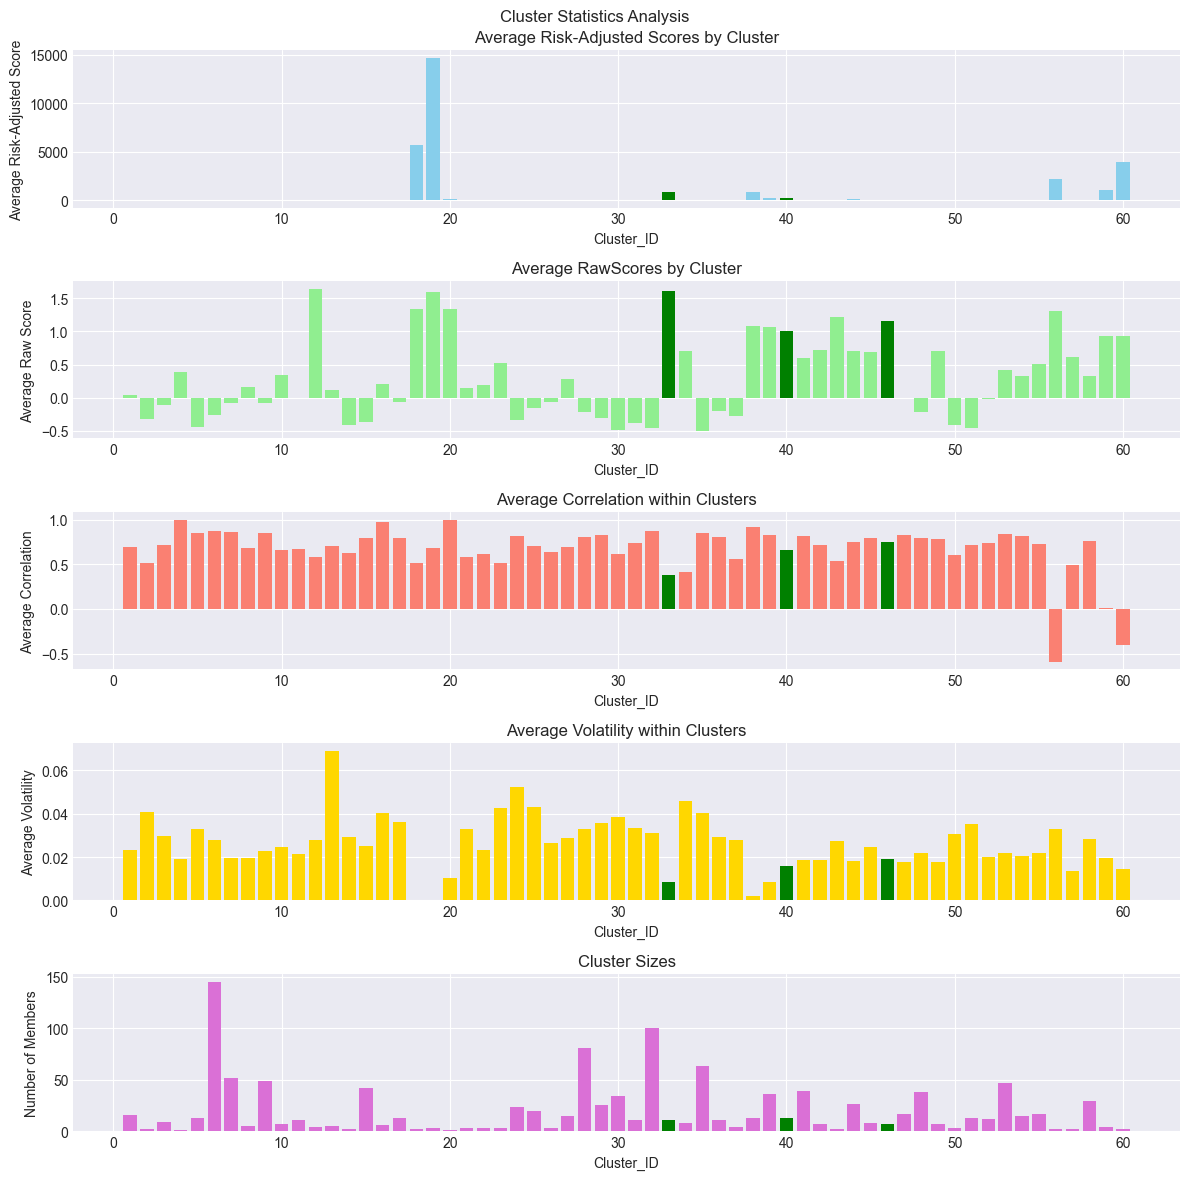

In [19]:
import matplotlib.pyplot as plt

PLOT_COLORS = ['lightgreen', 'skyblue', 'salmon', 'gold', 'orchid',
               'lightcoral', 'deepskyblue', 'mediumpurple', 'darkseagreen', 'tan']
HIGHLIGHT_COLOR = 'red'  # Color for highlighting selected clusters
HIGHLIGHT_COLOR = 'green'  # Color for highlighting selected clusters

# Create a figure with subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 12))
fig.suptitle('Cluster Statistics Analysis')

# Function to create bars with highlighted clusters
def create_bars(ax, x, y, color, highlight_ids):
    bars = ax.bar(x, y, color=[HIGHLIGHT_COLOR if cl_id in highlight_ids else color for cl_id in x])
    return bars

# Plot 1 Average Risk-Adjusted Score
create_bars(ax1, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Risk_Adj_Score'], 
            'skyblue', selected_cluster_ids)
ax1.set_title('Average Risk-Adjusted Scores by Cluster')
ax1.set_xlabel('Cluster_ID')
ax1.set_ylabel('Average Risk-Adjusted Score')

# Plot 2 Average Raw Score
create_bars(ax2, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Raw_Score'], 
            'lightgreen', selected_cluster_ids)
ax2.set_title('Average RawScores by Cluster')
ax2.set_xlabel('Cluster_ID')
ax2.set_ylabel('Average Raw Score')

# Plot 3: Average Correlation
create_bars(ax3, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_IntraCluster_Corr'], 
            'salmon', selected_cluster_ids)
ax3.set_title('Average Correlation within Clusters')
ax3.set_xlabel('Cluster_ID')
ax3.set_ylabel('Average Correlation')

# Plot 4: Average Volatility
create_bars(ax4, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Volatility'], 
            'gold', selected_cluster_ids)
ax4.set_title('Average Volatility within Clusters')
ax4.set_xlabel('Cluster_ID')
ax4.set_ylabel('Average Volatility')

# Plot 5 Cluster Size
create_bars(ax5, cluster_stats_df['Cluster_ID'], cluster_stats_df['Size'], 
            'orchid', selected_cluster_ids)
ax5.set_title('Cluster Sizes')
ax5.set_xlabel('Cluster_ID')
ax5.set_ylabel('Number of Members')

plt.tight_layout()
plt.show()

In [20]:
selected_stocks

,Cluster_ID,Ticker,Raw_Score,Risk_Adj_Score,Volatility,Cluster_Composite_Cluster_Score,Cluster_Avg_IntraCluster_Corr,Cluster_Avg_Volatility,Cluster_Avg_Raw_Score,Cluster_Avg_Risk_Adj_Score,Weight
4,33,SHY,2.3657,2031.4913,0.0012,1.3081,0.3807,0.0085,1.6033,898.4426,0.2372
3,33,VGSH,2.4664,1997.9299,0.0012,1.3081,0.3807,0.0085,1.6033,898.4426,0.2333
8,33,SPTS,2.0136,1549.8655,0.0013,1.3081,0.3807,0.0085,1.6033,898.4426,0.1810
96,40,BSCP,0.9829,2548.7390,0.0004,0.8076,0.6620,0.0160,1.0089,247.8301,0.2976
2,40,DG,2.7624,114.3786,0.0242,0.8076,0.6620,0.0160,1.0089,247.8301,0.0134
19,40,BJ,1.7950,88.3932,0.0203,0.8076,0.6620,0.0160,1.0089,247.8301,0.0103
21,46,UNH,1.7372,112.6555,0.0154,0.8868,0.7540,0.0192,1.1614,61.6986,0.0132
34,46,CNC,1.3655,62.9993,0.0217,0.8868,0.7540,0.0192,1.1614,61.6986,0.0074
39,46,KR,1.3147,57.0051,0.0231,0.8868,0.7540,0.0192,1.1614,61.6986,0.0067


In [21]:
cluster_performance

,Cluster_ID,Size,Avg_IntraCluster_Corr,Avg_Raw_Score,Avg_Risk_Adj_Score,Avg_Volatility,Composite_Cluster_Score,Stocks_Selected,Intra_Cluster_Diversification
32,33,11,0.3807,1.6033,898.4426,0.0085,1.3081,3,0.6193
45,46,7,0.7540,1.1614,61.6986,0.0192,0.8868,3,0.2460
39,40,13,0.6620,1.0089,247.8301,0.0160,0.8076,3,0.3380


In [22]:
# Step 1: Drop Tickers 
drop_tickers = ['BECN']
selected_stocks = selected_stocks[~selected_stocks['Ticker'].isin(drop_tickers)].copy()

# Step 1: Drop Cluster 
drop_cluster = 0
selected_stocks = selected_stocks[selected_stocks['Cluster_ID'] != drop_cluster].copy()

# Step 2: Recalculate weights based on remaining stocks' Risk_Adj_Scores
selected_stocks['Weight'] = selected_stocks['Risk_Adj_Score'] / selected_stocks['Risk_Adj_Score'].sum()

# Step 3: Display the updated portfolio
print(f"\n=== UPDATED PORTFOLIO (CLUSTER {drop_cluster}, TICKER {drop_tickers} REMOVED) ===")
# sorted_selected_stocks_df = selected_stocks[['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Weight', 'Volatility']] \
#               .sort_values(['Weight', 'Cluster_ID'], ascending=[False, False])
# Select columns, sort, and then set 'Ticker' as the index
sorted_selected_stocks_df = selected_stocks[['Cluster_ID', 'Ticker', 'Raw_Score', 'Risk_Adj_Score', 'Weight', 'Volatility']] \
              .sort_values(['Weight', 'Cluster_ID'], ascending=[False, False]) \
              .set_index('Ticker')



print(sorted_selected_stocks_df.to_string(index=True))

# Step 4: Extract the 'Ticker' column from the sorted DataFrame
ticker_order = sorted_selected_stocks_df.index.tolist()


# Optional: Print weight redistribution summary
original_total = 1.0
new_total = selected_stocks['Weight'].sum()
print(f"\nWeights redistributed from Cluster {drop_cluster} & Ticker {drop_tickers}: {original_total - new_total:.1%}")
print(f"New total weights sum to: {new_total:.0%}")


=== UPDATED PORTFOLIO (CLUSTER 0, TICKER ['BECN'] REMOVED) ===
        Cluster_ID  Raw_Score  Risk_Adj_Score  Weight  Volatility
Ticker                                                           
BSCP            40     0.9829       2548.7390  0.2976      0.0004
SHY             33     2.3657       2031.4913  0.2372      0.0012
VGSH            33     2.4664       1997.9299  0.2333      0.0012
SPTS            33     2.0136       1549.8655  0.1810      0.0013
DG              40     2.7624        114.3786  0.0134      0.0242
UNH             46     1.7372        112.6555  0.0132      0.0154
BJ              40     1.7950         88.3932  0.0103      0.0203
CNC             46     1.3655         62.9993  0.0074      0.0217
KR              46     1.3147         57.0051  0.0067      0.0231

Weights redistributed from Cluster 0 & Ticker ['BECN']: 0.0%
New total weights sum to: 100%


In [23]:
sorted_selected_stocks_df

,Cluster_ID,Raw_Score,Risk_Adj_Score,Weight,Volatility
Ticker,,,,,
BSCP,40,0.9829,2548.7390,0.2976,0.0004
SHY,33,2.3657,2031.4913,0.2372,0.0012
VGSH,33,2.4664,1997.9299,0.2333,0.0012
SPTS,33,2.0136,1549.8655,0.1810,0.0013
DG,40,2.7624,114.3786,0.0134,0.0242
UNH,46,1.7372,112.6555,0.0132,0.0154
BJ,40,1.7950,88.3932,0.0103,0.0203
CNC,46,1.3655,62.9993,0.0074,0.0217
KR,46,1.3147,57.0051,0.0067,0.0231


In [24]:
final_selected_stocks = pd.concat([sorted_selected_stocks_df, df_data.loc[ticker_order]], axis=1)
final_selected_stocks

,Cluster_ID,Raw_Score,Risk_Adj_Score,Weight,Volatility,Company,Info,"MktCap AUM, M",Beta,RSI,Perf YTD %,Perf 3D %,Perf Week %,Perf Month %,Perf Quart %,Perf Half %,Perf Year %,SMA20 %,SMA50 %,SMA200 %,50D High %,50D Low %,52W High %,52W Low %,ATR,ATR/Price %,Volatility W %,Volatility M %,"Volume, M","Avg Volume, M",Rel Volume,Price,Change %,Sharpe 3d,Sortino 3d,Omega 3d,Sharpe 5d,Sortino 5d,Omega 5d,Sharpe 10d,Sortino 10d,Omega 10d,Sharpe 15d,Sortino 15d,Omega 15d,Sharpe 30d,Sortino 30d,Omega 30d,Sharpe 60d,Sortino 60d,Omega 60d,Sharpe 120d,Sortino 120d,Omega 120d,Sharpe 250d,Sortino 250d,Omega 250d
Ticker,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BSCP,40,0.9829,2548.7390,0.2976,0.0004,Invesco BulletShares 2025 Corporate Bond ETF,"Financial, Exchange Traded Fund, Bonds - Corpo...",3630.0000,0.1000,47.2400,0.1500,0.0000,0.0000,-0.0500,0.1000,0.1500,1.1200,-0.0500,-0.0400,0.2300,-0.2400,0.1500,-0.2400,1.5200,0.0200,0.0967,0.0900,0.0700,2.9624,0.9668,3.0600,20.6800,0.0000,-18.5978,-13.5909,0.0000,-9.5862,-9.6270,0.2251,-2.0147,-2.5673,0.7385,-0.8092,-1.0451,0.8888,-1.0278,-1.3888,0.8584,0.2303,0.3403,1.0350,0.5337,0.7744,1.0817,1.5219,2.3265,1.2693
SHY,33,2.3657,2031.4913,0.2372,0.0012,iShares 1-3 Year Treasury Bond ETF,"Financial, Exchange Traded Fund, Bonds - Treas...",23050.0000,0.0400,58.8200,0.8700,0.3276,-0.0500,0.3800,0.8900,-0.1300,1.4400,0.2000,0.4200,0.4700,-0.4500,1.0000,-0.7300,2.2000,0.1800,0.2177,0.2000,0.1300,18.3417,3.6500,5.0300,82.6900,0.0100,-12.3944,-11.7663,0.0000,3.5928,12.9934,2.1354,5.3871,18.3106,3.0493,4.3841,10.5555,2.3471,2.7135,5.5193,1.6273,3.0938,5.8425,1.6922,0.4900,0.7600,1.0840,0.9800,1.4886,1.1819
VGSH,33,2.4664,1997.9299,0.2333,0.0012,Vanguard Short-Term Treasury ETF,"Financial, Exchange Traded Fund, Bonds - Treas...",22650.0000,0.0400,59.1400,0.8900,0.3762,0.0200,0.4100,0.9300,-0.1200,1.3800,0.2300,0.4500,0.4800,-0.4100,1.0500,-0.7300,2.1600,0.1200,0.2044,0.1800,0.1300,12.5304,3.1900,3.9300,58.7000,-0.0900,-3.5689,-5.4159,0.5175,4.7581,17.1197,2.5557,5.6669,19.9314,3.3536,4.3932,9.6816,2.3248,2.8782,5.5685,1.6677,3.1646,5.9576,1.7283,0.6814,1.0694,1.1188,1.0638,1.6117,1.1993
SPTS,33,2.0136,1549.8655,0.1810,0.0013,SPDR Portfolio Short Term Treasury ETF,"Financial, Exchange Traded Fund, Bonds - Treas...",6000.0000,0.0400,56.0600,0.7200,0.2745,-0.0700,0.3800,0.9000,-0.2000,1.3200,0.1500,0.3800,0.4100,-0.4900,0.9700,-0.8100,2.1000,0.0600,0.2053,0.1700,0.1400,6.7167,1.5200,4.4100,29.2200,-0.2000,-3.2804,-5.0771,0.5477,2.9981,6.2137,1.6541,4.3184,8.6719,2.2318,3.4257,6.1376,1.8703,2.5254,4.1194,1.5050,2.7162,4.4679,1.5561,0.5670,0.8449,1.0946,1.0282,1.5285,1.1844
DG,40,2.7624,114.3786,0.0134,0.0242,Dollar General Corp,"Consumer Defensive, Discount Stores",20240.0000,0.2200,67.6100,21.3700,2.0177,4.6500,12.4400,23.2400,12.3300,-42.1400,8.8800,17.2800,2.4400,-5.9600,32.7500,-43.1900,38.5200,3.5100,3.8144,4.8000,4.5000,7.8332,4.1600,1.8800,92.0200,-0.6500,-23.1621,-14.2853,0.0000,6.5170,19.7204,2.9523,8.0658,21.9373,3.3715,6.6845,17.9295,2.8259,2.9427,4.9322,1.6231,2.8679,4.9261,1.6479,0.9873,1.4945,1.1816,-0.9026,-1.0430,0.8186
UNH,46,1.7372,112.6555,0.0132,0.0154,Unitedhealth Group Inc,"Healthcare, Healthcare Plans",479950.0000,0.5000,58.1600,3.7200,0.2867,0.1800,6.3300,2.2800,-11.4800,15.2200,2.7700,3.0300,-3.9800,-5.2700,19.6600,-16.8100,20.2400,13.9800,2.6644,2.7100,2.2700,7.2360,4.8800,1.4800,524.7000,-0.0700,-11.8912,-11.5437,0.0000,0.5254,0.9214,1.1129,2.2894,3.8901,1.5981,3.2367,5.6621,1.9020,4.3670,7.3557,2.0301,0.1920,0.2444,1.0346,-0.7890,-0.9739,0.8671,0.5244,0.7151,1.1006
BJ,40,1.7950,88.3932,0.0103,0.0203,BJ's Wholesale Club Holdings Inc,"Consumer Defensive, Discount Stores",15080.0000,0.5600,58.3900,28.1800,-0.3827,0.3800,-0.8400,30.1500,33.7500,50.6400,2.4300,7.0000,23.3200,-4.9000,18.5400,-4.9000,59.4900,3.6700,3.2044,3.6100,2.9400,3.6435,1.8500,1.9700,114.5300,-0.7600,-20.7381,-13.9606,0.0000,-0.4799,-0.8301,0.9159,4.6756,8.5569,2.1472,2.6162,4.4848,1.5113,1.7070,3.572

In [25]:
final_cluster_ids = final_selected_stocks['Cluster_ID'].unique().tolist()

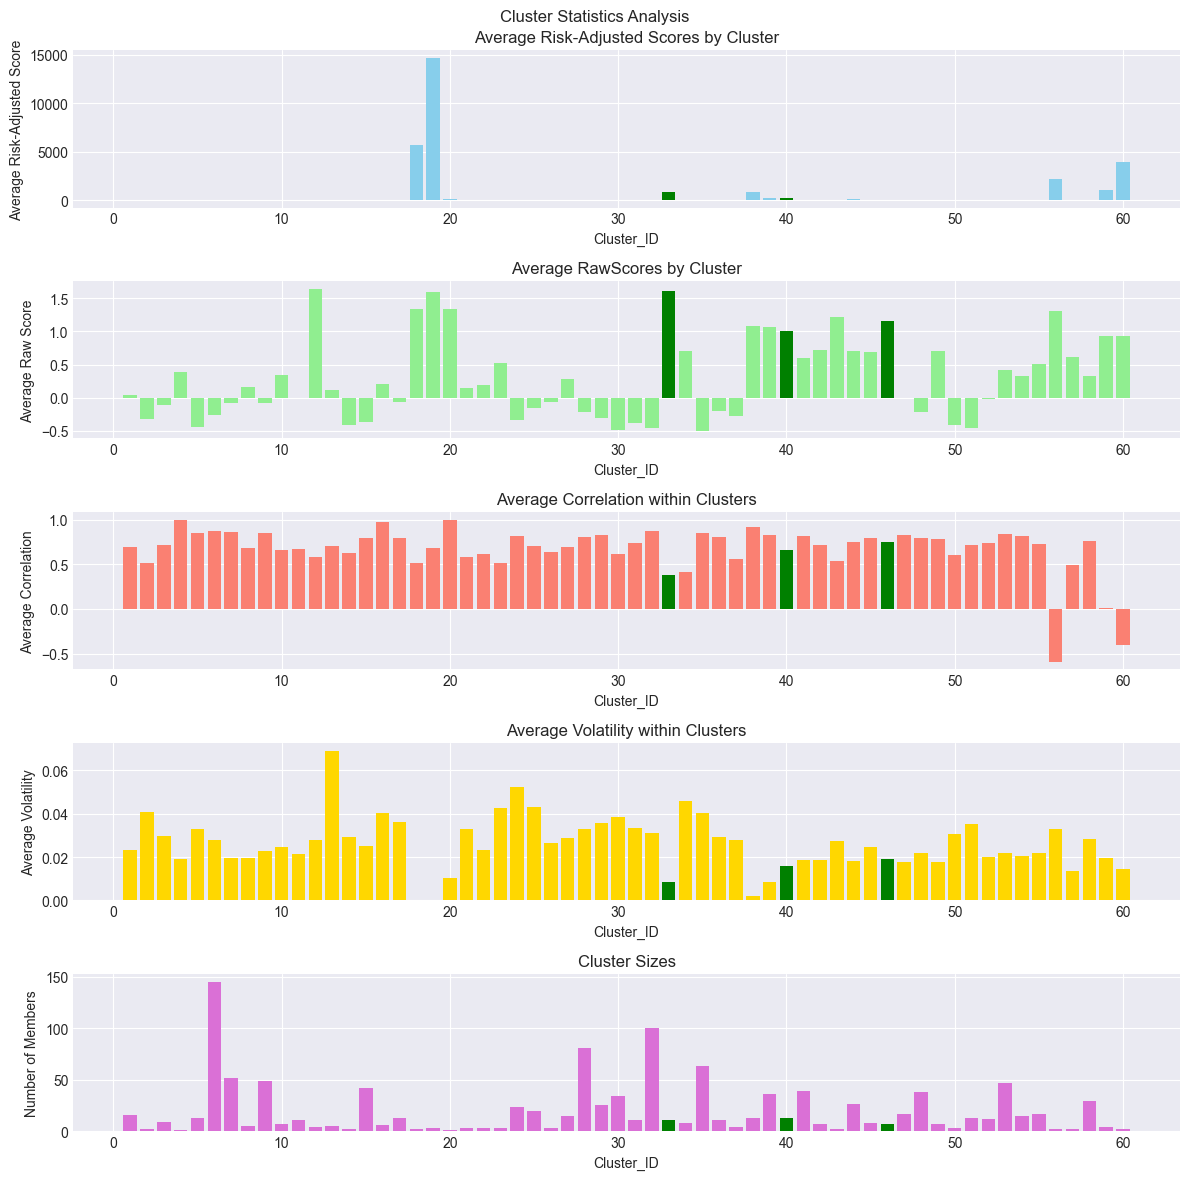

In [26]:
import matplotlib.pyplot as plt

PLOT_COLORS = ['lightgreen', 'skyblue', 'salmon', 'gold', 'orchid',
               'lightcoral', 'deepskyblue', 'mediumpurple', 'darkseagreen', 'tan']
HIGHLIGHT_COLOR = 'red'  # Color for highlighting selected clusters
HIGHLIGHT_COLOR = 'green'  # Color for highlighting selected clusters

# Create a figure with subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(12, 12))
fig.suptitle('Cluster Statistics Analysis')

# Function to create bars with highlighted clusters
def create_bars(ax, x, y, color, highlight_ids):
    bars = ax.bar(x, y, color=[HIGHLIGHT_COLOR if cl_id in highlight_ids else color for cl_id in x])
    return bars

# Plot 1 Average Risk-Adjusted Score
create_bars(ax1, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Risk_Adj_Score'], 
            'skyblue', final_cluster_ids)
ax1.set_title('Average Risk-Adjusted Scores by Cluster')
ax1.set_xlabel('Cluster_ID')
ax1.set_ylabel('Average Risk-Adjusted Score')

# Plot 2 Average Raw Score
create_bars(ax2, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Raw_Score'], 
            'lightgreen', final_cluster_ids)
ax2.set_title('Average RawScores by Cluster')
ax2.set_xlabel('Cluster_ID')
ax2.set_ylabel('Average Raw Score')

# Plot 3: Average Correlation
create_bars(ax3, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_IntraCluster_Corr'], 
            'salmon', final_cluster_ids)
ax3.set_title('Average Correlation within Clusters')
ax3.set_xlabel('Cluster_ID')
ax3.set_ylabel('Average Correlation')

# Plot 4: Average Volatility
create_bars(ax4, cluster_stats_df['Cluster_ID'], cluster_stats_df['Avg_Volatility'], 
            'gold', final_cluster_ids)
ax4.set_title('Average Volatility within Clusters')
ax4.set_xlabel('Cluster_ID')
ax4.set_ylabel('Average Volatility')

# Plot 5 Cluster Size
create_bars(ax5, cluster_stats_df['Cluster_ID'], cluster_stats_df['Size'], 
            'orchid', final_cluster_ids)
ax5.set_title('Cluster Sizes')
ax5.set_xlabel('Cluster_ID')
ax5.set_ylabel('Number of Members')

plt.tight_layout()
plt.show()

In [27]:
output_filename_tsv = f"..\picks\{date_str}_selected_stocks.tsv"

final_selected_stocks.to_csv(output_filename_tsv, sep='\t', encoding='utf-8', index=True)

In [28]:
final_selected_stocks.to_parquet(f'..\picks\{date_str}_selected_stocks.parquet')
cluster_stats_df.to_parquet(f'..\picks\{date_str}_cluster_stats_df.parquet')
detailed_clusters_df.to_parquet(f'..\picks\{date_str}_detailed_clusters_df.parquet')

In [29]:
# Calculate summary statistics for cluster_stats_df
stats_summary = pd.DataFrame({
    'Count': cluster_stats_df.count(numeric_only=True),
    'Sum': cluster_stats_df.sum(numeric_only=True),
    'Mean': cluster_stats_df.mean(numeric_only=True),
    'Std': cluster_stats_df.std(numeric_only=True),
    'Mean+1Std (68%)': cluster_stats_df.mean(numeric_only=True) + cluster_stats_df.std(numeric_only=True),
    'Mean-1Std (68%)': cluster_stats_df.mean(numeric_only=True) - cluster_stats_df.std(numeric_only=True),
    'Mean+2Std (95%)': cluster_stats_df.mean(numeric_only=True) + 2*cluster_stats_df.std(numeric_only=True),
    'Mean-2Std (95%)': cluster_stats_df.mean(numeric_only=True) - 2*cluster_stats_df.std(numeric_only=True),
    'Min': cluster_stats_df.min(numeric_only=True),
    'Max': cluster_stats_df.max(numeric_only=True),
})

print("Summary Statistics for Cluster Data:")
display(stats_summary.round(4))

Summary Statistics for Cluster Data:


,Count,Sum,Mean,Std,Mean+1Std (68%),Mean-1Std (68%),Mean+2Std (95%),Mean-2Std (95%),Min,Max
Cluster_ID,60,1830.0000,30.5000,17.4642,47.9642,13.0358,65.4285,-4.4285,1.0000,60.0000
Size,60,1169.0000,19.4833,26.0166,45.4999,-6.5333,71.5166,-32.5499,1.0000,145.0000
Avg_IntraCluster_Corr,60,40.3864,0.6731,0.2733,0.9464,0.3998,1.2197,0.1265,-0.5966,1.0000
Avg_Raw_Score,60,18.3421,0.3057,0.6151,0.9208,-0.3094,1.5359,-0.9245,-0.5056,1.6424
Avg_Risk_Adj_Score,60,30388.2666,506.4711,2084.4344,2590.9055,-1577.9633,4675.3399,-3662.3977,-14.2961,14693.8818
Avg_Volatility,60,1.5635,0.0261,0.0122,0.0383,0.0139,0.0505,0.0017,0.0001,0.0690


In [30]:
# Sort by Avg_Raw_Score in descending order
sorted_by_Avg_Raw_Score = cluster_stats_df.sort_values('Avg_Raw_Score', ascending=False)
print(f'sorted_by_Avg_Raw_Score')
display(sorted_by_Avg_Raw_Score.head(10))

sorted_by_Avg_Raw_Score


,Cluster_ID,Size,Avg_IntraCluster_Corr,Avg_Raw_Score,Avg_Risk_Adj_Score,Avg_Volatility
11,12,4,0.5811,1.6424,55.3046,0.0280
32,33,11,0.3807,1.6033,898.4426,0.0085
18,19,3,0.6819,1.5949,14693.8818,0.0001
19,20,1,1.0000,1.3413,131.6048,0.0102
17,18,2,0.5115,1.3294,5719.8014,0.0002
55,56,2,-0.5966,1.3057,2165.9055,0.0331
42,43,2,0.5409,1.2121,49.0552,0.0276
45,46,7,0.7540,1.1614,61.6986,0.0192
37,38,13,0.9182,1.0766,818.4941,0.0021
38,39,36,0.8308,1.0667,193.3433,0.0084


In [31]:
# Check if 'GLD' is present in df_cov
has_ticker_cov = 'GLD' in df_cov.index and 'GLD' in df_cov.columns

print(f"Is 'GLD' present in covariance matrix? {has_ticker_cov}")

if has_ticker_cov:
  # Print covariance for GLD vs itself (variance) if exists
  print(f"\nVariance for GLD: {df_cov.loc['GLD', 'GLD']}")

Is 'GLD' present in covariance matrix? True

Variance for GLD: 0.00012429389262294706


In [32]:
# Check if 'GLD' is present in df_corr
has_ticker_cov = 'GLD' in df_corr.index and 'GLD' in df_corr.columns

print(f"Is 'GLD' present in covariance matrix? {has_ticker_cov}")

if has_ticker_cov:
  # Print covariance for GLD vs itself (variance) if exists
  print(f"\nVariance for GLD: {df_corr.loc['GLD', 'GLD']}")

Is 'GLD' present in covariance matrix? True

Variance for GLD: 1.0


In [33]:
zscore_df.loc['GLD']

weighted_sharpe                        0.1119
weighted_sortino                       0.1420
weighted_omega                         0.1127
weighted_momentum                      0.2162
weighted_sma                           0.2118
weighted_volatility                    0.1190
weighted_rsi                           0.0000
sharpe_zscores_Sharpe 3d              -1.2428
sharpe_zscores_Sharpe 5d              -1.0378
sharpe_zscores_Sharpe 10d              1.1312
sharpe_zscores_Sharpe 15d              0.6510
sharpe_zscores_Sharpe 30d              1.7990
sharpe_zscores_Sharpe 60d              2.0572
sortino_zscores_Sortino 3d            -0.1795
sortino_zscores_Sortino 5d            -0.6273
sortino_zscores_Sortino 10d            0.7267
sortino_zscores_Sortino 15d            0.4268
sortino_zscores_Sortino 30d            1.7748
sortino_zscores_Sortino 60d            2.1380
omega_zscores_Omega 3d                -0.1199
omega_zscores_Omega 5d                -0.3874
omega_zscores_Omega 10d           

In [34]:
logging.shutdown()